## 1. Introduction

### Osteoporosis
Osteoporosis is the most common bone disease that develops when bone mineral density and bone mass decreases, or when the structure and strength of bone changes. It can increase the risk of fractures, i.e., broken bones. 

In the United States in 2010, an estimated 10.2 million people aged 50 and over had osteoporosis and about 43.3 million more people had low bone mass. However, it's a silent disease because people typically do not have symptom. Therefore, it would be benefitical to people's health if we can make an accurate prediction for it.

### NHANES
The National Health and Nutrition Examination Survey (NHANES) is a program of studies designed to assess the health and nutritional status of adults and children in the United States. Datasets of this program are prepared and published through the Centers for Disease Control and Prevention (CDC) and avaiable to the public.

In this project, we are going to analyze data from **NHANES** for the years **2013-2014, and 2017-March 2020 Pre-Pandemic**. 2015-2016 was skipped because Osteoporosis assessment in NHANES for that period was not completed. The NHANES program suspended field operations in March 2020 due to the coronavirus disease 2019 (COVID-19) pandemic. As a result, data collection for the NHANES 2019-2020 cycle was not completed and the collected data are not nationally representative. Therefore, data collected from 2019 to March 2020 were combined with data from the NHANES 2017-2018 cycle to form a nationally representative sample of NHANES 2017-March 2020 pre-pandemic data.

## 2. Objective

Design an accurate way to predict whether someone has osteoporosis based on age, gender, race, BMI, smoking, alcohol consumption, sleep hours, arthritis, liver condition, and whether a parent has osteoporosis.

## 3. Data Source

2013-2014 data can be downloaded from [link1](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2013), 2017-2020 data can be downloaded from [link2](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?Cycle=2017-2020). Files can be linked with other NHANES files by the respondent sequence number (SEQN). 

**1. Questionnaire Data: Osteoporosis**

The target sample for Osteoporosis Questionnaire in 2013-2014 and 2017-2020 are participants aged **40+** and **50+**, respectively.

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `OSQ150`: Parents ever told had osteoporosis?
- `OSQ060`: Ever told had osteoporosis/brittle bones
See the table for details of `OSQ150` and `OSQ060` 
| Code or Value | Value Description |
|---------------|-------------------|
| 1             | Yes               |
| 2             | No                |
| 7             | Refused           |
| 9             | Don't know        |
| .             | Missing           |


**2. Demographic Variables and Sample Weights**

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `RIDAGEYR`: Age in years at screening
- `RIAGENDR`: Gender, see the table for details:
| Code or Value | Value Description |
|---------------|-------------------|
| 1             | Male              |
| 2             | Female            |
| .             | Missing           |

- `RIDRETH3 `: Race/Hispanic origin w/ Non-Hispanic Asian
| Code or Value | Value Description                   |
|---------------|-------------------------------------|
| 1             | Mexican American                    |
| 2             | Other Hispanic                      |
| 3             | Non-Hispanic White                  |
| 4             | Non-Hispanic Black                  |
| 6             | Non-Hispanic Asian                  |
| 7             | Other Race - Including Multi-Racial |
| .             | Missing                             |

**3. Examination Data: Body Measures**

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `BMXBMI`: Body Mass Index (kg/m**2)

**4. Questionnaire Data: Smoking - Cigarette Use**

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `SMQ020`:Smoked at least 100 cigarettes in life, see the table for details:
| Code or Value | Value Description |
|---------------|-------------------|
| 1             | Yes               |
| 2             | No                |
| 7             | Refused           |
| 9             | Don't know        |
| .             | Missing           |

**5. Questionnaire Data: Alcohol Use**

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `ALQ151`: Ever have 4/5 or more drinks every day, see the table for details:

| Code or Value | Value Description |
|---------------|-------------------|
| 1             | Yes               |
| 2             | No                |
| 7             | Refused           |
| 9             | Don't know        |
| .             | Missing           |


**6. Questionnaire Data: Sleep Disorders**

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `SLD010H (SLD012)`: How much sleep do you get (hours), see the table for details:
| Code or Value | Value Description              |
|---------------|--------------------------------|
| 2 to 11       | Range of Values                |
| 12            | 12 hours or more              |
| 77            | Refused                        |
| 99            | Don't know                     |


**7. Questionnaire Data: Medical Conditions**

This project focus on the following fields:
- `SEQN`: Respondent sequence number
- `MCQ160A`: Doctor ever said you had arthritis
- `MCA160L`: Ever told you had any liver condition

They all share the following table for details:

| Code or Value | Value Description |
|---------------|-------------------|
| 1             | Yes               |
| 2             | No                |
| 7             | Refused           |
| 9             | Don't know        |
| .             | Missing           |



## 4. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.combine import SMOTETomek
import xgboost as xgb

import importlib
import data_clean_utils
import machine_learning_utils
# todo
importlib.reload(data_clean_utils)
importlib.reload(machine_learning_utils)


from data_clean_utils import (
    import_data,
    clean_variable,
    clean_demographic, 
    clean_bmi,
    number_to_category,
    clean_sleep,
    get_percentage,
    countplot_by_category,
    barplot_percentage,
    multi_hist,
    multi_countplot,
    plot_both_gender,
    gender_groupby,
    get_prevalence_ratios,
)
from machine_learning_utils import (
    make_mi_scores,
    train_test_standardscaler,
    plot_cf_matrix,
    get_predict_proba,
    plot_auc,
    binary_classification_scores,
    compare_oversampling_performance,
    get_nn_models,
    evaludate_nn_models,
)

# display settings of Pandas
pd.options.display.max_seq_items = 1000
pd.options.display.max_rows = 1000 
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 50

# ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

# set seaborn theme
custom_params = {"axes.spines.right": False, "axes.spines.top": False, 
                 "figure.dpi":100, 'savefig.dpi':100}
sns.set_theme(style="ticks", rc=custom_params)
%config InlineBackend.figure_format = "retina"

2023-03-15 15:24:45.363990: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 5. Importing the Data

### 5.1 Osteoporosis

In [2]:
data_oste = import_data('osteoporosis.XPT')
data_oste = data_oste[['SEQN', 'OSQ060']]
data_oste.head()

,SEQN,OSQ060
0,73557.0,2.0
1,73558.0,2.0
2,73559.0,1.0
3,73561.0,2.0
4,73562.0,2.0


In [3]:
data_oste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8802 entries, 0 to 4986
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    8802 non-null   float64
 1   OSQ060  8801 non-null   float64
dtypes: float64(2)
memory usage: 206.3 KB


In [4]:
data_oste.OSQ060.value_counts()

2.0    7833
1.0     933
9.0      34
7.0       1
Name: OSQ060, dtype: int64

Osteoporosis as the target (dependent) variable, we only need the data whose `OSQ060` is 2 (No) or 1 (Yes) later. 

### 5.2 Demographics

In [5]:
data_demo = import_data('demographics.XPT')
# test eth1 without asian as it's not in 2009-2010
# data_demo = data_demo[['SEQN', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH3']]
data_demo = data_demo[['SEQN', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH3']]
data_demo.head()

,SEQN,RIDAGEYR,RIAGENDR,RIDRETH3
0,73557.0,69.0,1.0,4.0
1,73558.0,54.0,1.0,3.0
2,73559.0,72.0,1.0,3.0
3,73560.0,9.0,1.0,3.0
4,73561.0,73.0,2.0,3.0


In [6]:
data_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25735 entries, 0 to 15559
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      25735 non-null  float64
 1   RIDAGEYR  25735 non-null  float64
 2   RIAGENDR  25735 non-null  float64
 3   RIDRETH3  25735 non-null  float64
dtypes: float64(4)
memory usage: 1005.3 KB


In [7]:
data_demo.describe()

,SEQN,RIDAGEYR,RIAGENDR,RIDRETH3
count,25735.000000,2.573500e+04,25735.000000,25735.000000
mean,101860.656693,3.284958e+01,1.505576,3.408510
std,19185.829389,2.499293e+01,0.499979,1.621798
min,73557.000000,5.397605e-79,1.000000,1.000000
25%,79990.500000,1.000000e+01,1.000000,3.000000
50%,111955.000000,2.900000e+01,2.000000,3.000000
75%,118388.500000,5.500000e+01,2.000000,4.000000
max,124822.000000,8.000000e+01,2.000000,7.000000


What we can learn:

- There is no missing values in the demographics dataframe.
- `SEQN` should be string as it's the identifier of respondent.
- `RIAGENDR`, and `RIDRETH3` are actually categorical data, we might need to convert them for easier interpretation in EDA.

### 5.3 BMI

In [8]:
data_bmi = import_data('body-measures.XPT')
data_bmi = data_bmi[['SEQN', 'BMXBMI']]
data_bmi.head()

,SEQN,BMXBMI
0,73557.0,26.7
1,73558.0,28.6
2,73559.0,28.9
3,73560.0,17.1
4,73561.0,19.7


In [9]:
data_bmi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24113 entries, 0 to 14299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    24113 non-null  float64
 1   BMXBMI  22192 non-null  float64
dtypes: float64(2)
memory usage: 565.1 KB


In [10]:
data_bmi.describe()

,SEQN,BMXBMI
count,24113.000000,22192.000000
mean,101431.636545,26.257548
std,19283.894500,8.247252
min,73557.000000,11.900000
25%,79810.000000,20.100000
50%,111702.000000,25.400000
75%,118322.000000,30.900000
max,124822.000000,92.300000


What we can learn:

- `BMXBMI` has about 8% missing values. Considering the inaccuracy of data imputation and the size of not missing records, let's delete those missing records directly.

### 5.4 Smoking

In [11]:
data_smoking = import_data('smoking.XPT')
data_smoking = data_smoking[['SEQN', 'SMQ020']]
data_smoking.head()

,SEQN,SMQ020
0,73557.0,1.0
1,73558.0,1.0
2,73559.0,1.0
3,73561.0,2.0
4,73562.0,1.0


In [12]:
data_smoking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18305 entries, 0 to 11136
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    18305 non-null  float64
 1   SMQ020  15806 non-null  float64
dtypes: float64(2)
memory usage: 429.0 KB


In [13]:
data_smoking.SMQ020.value_counts()

2.0    9331
1.0    6468
9.0       5
7.0       2
Name: SMQ020, dtype: int64

There are some missing data because some respondents skipped the questions. Among those answers, we only need data in which `SMQ020` is 1 (Yes) or 2 (No).

### 5.5 Alcohol

We need to get 2009-2010, 2013-2014, 2017-2020 dataset separately, because the variable names are different.

In [14]:
data_alcohol = import_data('alcohol.XPT')
data_alcohol = data_alcohol[['SEQN', 'ALQ151']]
data_alcohol.head()

,SEQN,ALQ151
0,73557.0,1.0
1,73558.0,1.0
2,73559.0,2.0
3,73561.0,2.0
4,73562.0,2.0


In [15]:
data_alcohol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14889 entries, 0 to 8964
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    14889 non-null  float64
 1   ALQ151  11978 non-null  float64
dtypes: float64(2)
memory usage: 349.0 KB


In [16]:
data_alcohol.ALQ151.value_counts()

2.0    10106
1.0     1861
9.0       10
7.0        1
Name: ALQ151, dtype: int64

Similarly, we only need data in which ALQ151 is 1 (Yes) or 2 (No).

### 5.6 Sleep Hours

We need to get 2009-2010, 2013-2014, 2017-2020 dataset separately, because the variable names are different.

In [17]:
data_sleep_13, data_sleep_17 = import_data('sleep.XPT', split=True)
data_sleep_13 = data_sleep_13[['SEQN', 'SLD010H']]
data_sleep_17 = data_sleep_17[['SEQN', 'SLD012']].rename(columns={'SLD012': 'SLD010H'})
data_sleep = pd.concat([data_sleep_13, data_sleep_17])
data_sleep.head()

,SEQN,SLD010H
0,73557.0,7.0
1,73558.0,9.0
2,73559.0,8.0
3,73561.0,9.0
4,73562.0,5.0


In [18]:
data_sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16659 entries, 0 to 10194
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     16659 non-null  float64
 1   SLD010H  16566 non-null  float64
dtypes: float64(2)
memory usage: 390.4 KB


In [19]:
data_sleep.describe()

,SEQN,SLD010H
count,16659.000000,16566.000000
mean,102178.545051,7.410570
std,19122.931951,2.486186
min,73557.000000,2.000000
25%,80138.500000,6.000000
50%,112125.000000,7.500000
75%,118493.500000,8.000000
max,124822.000000,99.000000


The max value of `SLD010H` 99 doesn't mean 99 hours, it indicates "Don't know".  We should select the data with
valid sleep hours only.

### 5.7 Medical Conditions

The dataset contains medical conditions: arthritis, liver condition.

In [20]:
data_medical = import_data('medical.XPT')
data_medical = data_medical[['SEQN', 'MCQ160A', 'MCQ160L']]
data_medical.head()

,SEQN,MCQ160A,MCQ160L
0,73557.0,1.0,2.0
1,73558.0,2.0,2.0
2,73559.0,2.0,2.0
3,73560.0,NaN,NaN
4,73561.0,1.0,2.0


In [21]:
data_medical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24756 entries, 0 to 14985
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     24756 non-null  float64
 1   MCQ160A  15001 non-null  float64
 2   MCQ160L  15001 non-null  float64
dtypes: float64(3)
memory usage: 773.6 KB


In [22]:
data_medical[['MCQ160A', 'MCQ160L']].value_counts()

MCQ160A  MCQ160L
2.0      2.0        10260
1.0      2.0         3983
2.0      1.0          361
1.0      1.0          330
9.0      2.0           33
2.0      9.0           21
1.0      9.0            7
9.0      1.0            5
         9.0            1
dtype: int64

We only need the records with 1 (Yes) or 2 (No) value.

<!-- ### 5.8 Test High Blood -->

### 5.8 Parent Osteoporosis

Check whether osteoporosis is related to parental osteoporosis.

In [25]:
data_oste_parent = import_data('osteoporosis.XPT')
data_oste_parent = data_oste_parent[['SEQN', 'OSQ150']]
data_oste_parent.head()

,SEQN,OSQ150
0,73557.0,2.0
1,73558.0,2.0
2,73559.0,2.0
3,73561.0,2.0
4,73562.0,2.0


In [26]:
data_oste_parent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8802 entries, 0 to 4986
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    8802 non-null   float64
 1   OSQ150  8801 non-null   float64
dtypes: float64(2)
memory usage: 206.3 KB


## 6. Data Processing

### 6.1 Cleaning and Merging the Data

We will need to clean each dataset and then merge them together for future analysis. Corresponding functions can be found in the seperate file. `SEQN` is the key to connect all datasets, it has been renamed to `ID` and converted to string type.

To interpret the demographics data, we need to rename the columns to make it more readable, and replace
numeric code values in Gender and Race with real life values. 

For BMI data, we just need to rename the BMI column and make sure its data type is float.

For smoking, alcohol data, we need to convert code values to "Yes" or "No", and rename the columns to increase the readability.

For sleep hours, we should keep records with valid sleep hours only, remove code values for "Refused" or "Don't know" or missing values.

Osteoporosis is the target we want to predict accurately. Therefore, we will keep the data that answered Yes or No to the question "Ever told had osteoporosis/brittle bones" and ignore those with unsure answers.

In [27]:
df_demo = clean_demographic(data_demo)
df_bmi = clean_bmi(data_bmi)
df_smoking = clean_variable(data_smoking, col_list=["SMQ020"])
df_alcohol = clean_variable(data_alcohol, col_list=["ALQ151"])
df_sleep = clean_sleep(data_sleep)
df_medical = clean_variable(data_medical, col_list=["MCQ160A", "MCQ160L"])
df_oste_parent = clean_variable(data_oste_parent, col_list=["OSQ150"])
df_oste = clean_variable(data_oste, col_list=["OSQ060"])

Then we need to merge all datasets.

In [33]:
df_merged = (
    df_demo.merge(df_bmi, how='outer', on='ID')
    .merge(df_smoking, how='outer', on='ID')
    .merge(df_alcohol, how='outer', on='ID')
    .merge(df_sleep, how='outer', on='ID')
    .merge(df_medical, how='outer', on='ID')
    .merge(df_oste_parent, how='outer', on='ID')
    .merge(df_oste, how='outer', on='ID')  
)        
# remove duplicates
df_merged = df_merged.drop_duplicates()
# ID is no longer needed
df_merged = df_merged.drop(columns=['ID']) 
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25735 entries, 0 to 25734
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  25735 non-null  float64 
 1   Gender               25735 non-null  category
 2   Race                 25735 non-null  category
 3   BMI                  22192 non-null  float64 
 4   Smoking              15799 non-null  category
 5   Heavy Drinking       11967 non-null  category
 6   Sleep Hours          16559 non-null  float64 
 7   Arthritis            14934 non-null  category
 8   Liver Condition      14934 non-null  category
 9   Parent Osteoporosis  8270 non-null   category
 10  Osteoporosis         8766 non-null   category
dtypes: category(8), float64(3)
memory usage: 1006.3 KB


In [34]:
df_merged.describe()

,Age,BMI,Sleep Hours
count,2.573500e+04,22192.000000,16559.000000
mean,3.284958e+01,26.257548,7.371852
std,2.499293e+01,8.247252,1.623542
min,5.397605e-79,11.900000,2.000000
25%,1.000000e+01,20.100000,6.000000
50%,2.900000e+01,25.400000,7.500000
75%,5.500000e+01,30.900000,8.000000
max,8.000000e+01,92.300000,14.000000


### 6.2 Missing Values

Check percentage of missing values:

In [35]:
df_merged.isnull().mean().sort_values()*100

Age                     0.000000
Gender                  0.000000
Race                    0.000000
BMI                    13.767243
Sleep Hours            35.655722
Smoking                38.608898
Arthritis              41.970080
Liver Condition        41.970080
Heavy Drinking         53.499126
Osteoporosis           65.937439
Parent Osteoporosis    67.864776
dtype: float64

Most missing data are from `Osteoporosis`, as we've seen in data importing, the Osteoporosis Questionnaire focused on 8802 respondents (aged 40 and over, according to the [data document](https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/OSQ_H.htm#OSQ060)), while other data such as Demographic, focused on 25735 respondents aged 0-80.

According to [National Institutes of Health](https://www.nia.nih.gov/health/osteoporosis), osteoporosis is more common among people over age 50. So it's reasonable to just focus on those respondents aged 40+ who answered Osteoporosis Questionnaire.

In [36]:
# make sure the target is not null
df_merged = df_merged.dropna(subset=['Osteoporosis'])
# check percentage of missing values of each variable
df_merged.isnull().sum().sort_values()

Age                       0
Gender                    0
Race                      0
Osteoporosis              0
Smoking                   5
Arthritis                49
Liver Condition          49
Sleep Hours              69
Parent Osteoporosis     520
BMI                     667
Heavy Drinking         2088
dtype: int64

There are still some missing data from `Smoking`, `Arthritis`, `Liver Condition`, `Sleep Hours`, `Parent Osteoporosis`, `BMI`, and especially, `Heavy Drinking`. 

Data imputation (either by mean, mode, or machine learning algorithms) leads to inaccuracy, so we are going to analyze complete data by removing those missing data. But will it lead to bias? Let's examine the overall distribution versus the missing data distribution.

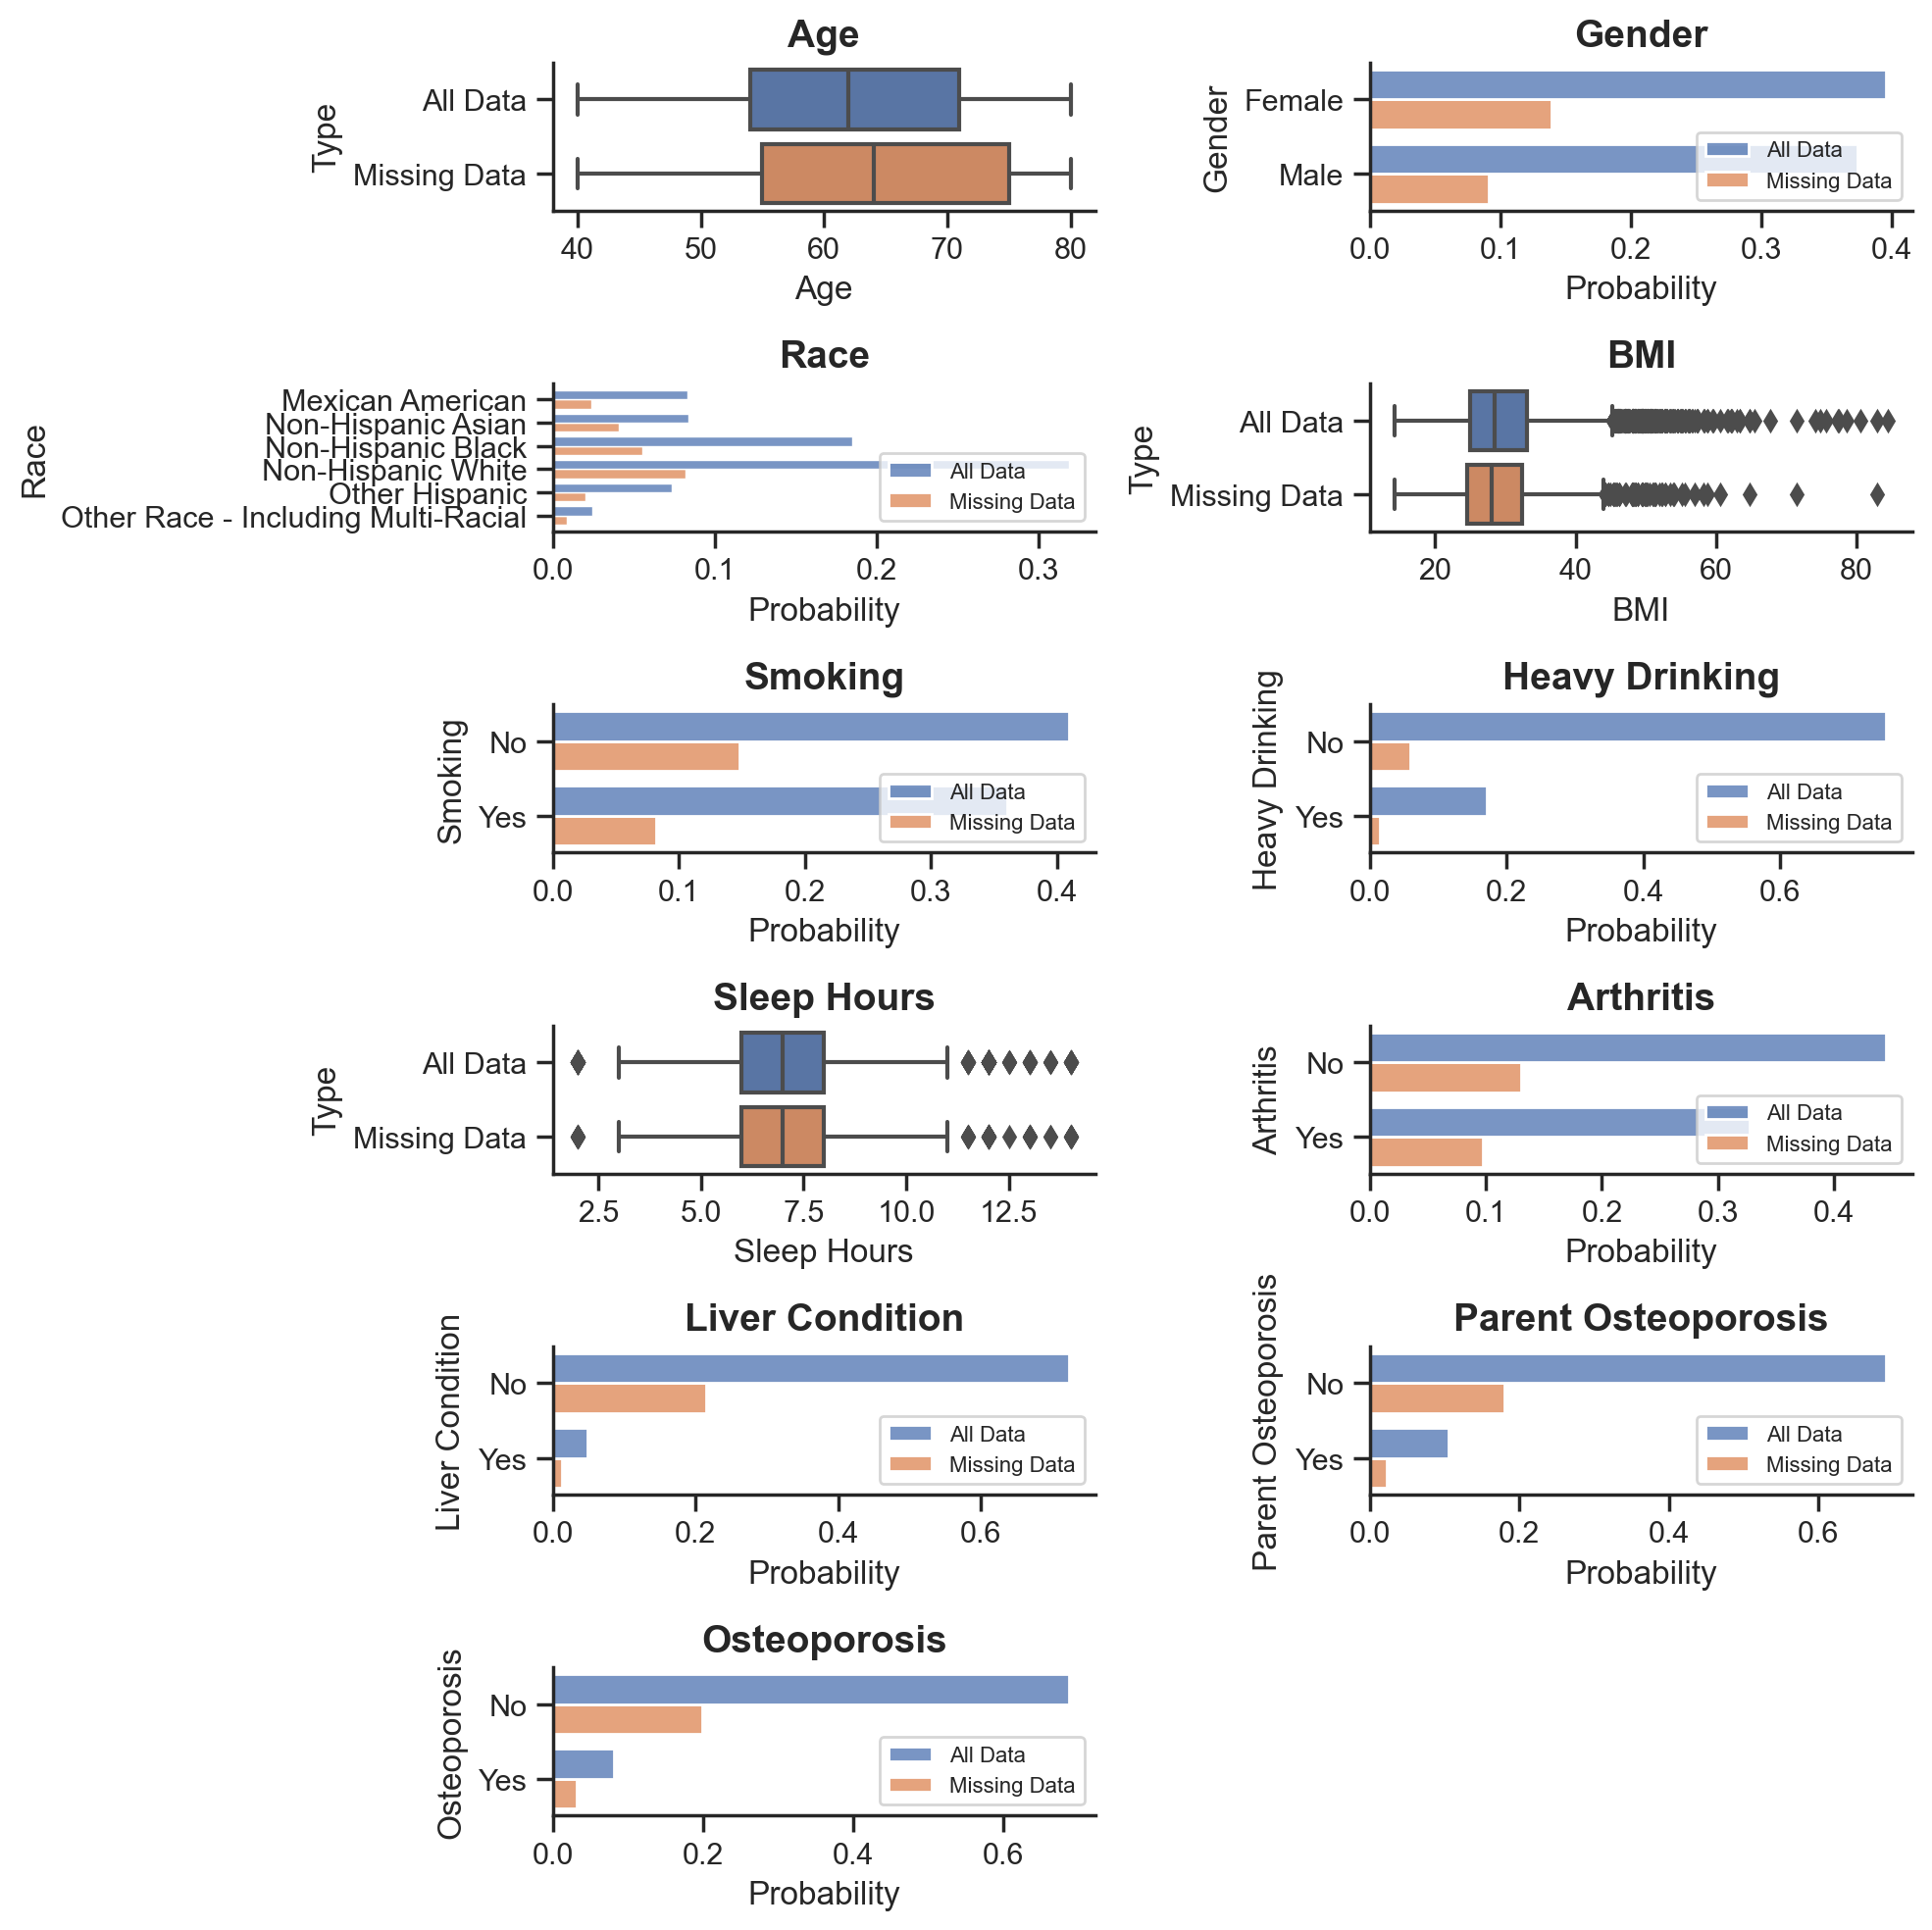

In [37]:
# all data
all_data = df_merged.copy()
all_data['Type'] = 'All Data'
# missing data
missing_data = df_merged[df_merged.isnull().values.any(axis=1)]
missing_data['Type'] = 'Missing Data'
# combined all data and missing values
comparison = pd.concat([all_data, missing_data])
comparison = comparison.reset_index()
comparison.drop(columns=['index'], inplace=True)

var_list = comparison.columns.tolist()
var_list.remove('Type')
# histplot of all data vs. missing data
plt.figure(figsize=(10, 10))
multi_hist(comparison, hue='Type', var_list=var_list)

The distribution of all data and missing data is very close, direct removal should not cause too much bias.

In [38]:
# remove missing values
df_merged = df_merged.dropna()
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6144 entries, 0 to 25734
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  6144 non-null   float64 
 1   Gender               6144 non-null   category
 2   Race                 6144 non-null   category
 3   BMI                  6144 non-null   float64 
 4   Smoking              6144 non-null   category
 5   Heavy Drinking       6144 non-null   category
 6   Sleep Hours          6144 non-null   float64 
 7   Arthritis            6144 non-null   category
 8   Liver Condition      6144 non-null   category
 9   Parent Osteoporosis  6144 non-null   category
 10  Osteoporosis         6144 non-null   category
dtypes: category(8), float64(3)
memory usage: 241.1 KB


The final data is 6144 rows x 11 columns.

In [39]:
# save the cleaned data
df_merged.to_csv("data/cleaned_NHANES.csv", index=False)

## 7. EDA

### 7.1 Basic Distribution of the Dataset 

We can visualize the dataset by each categorical variable to have a bettering understanding of the data.

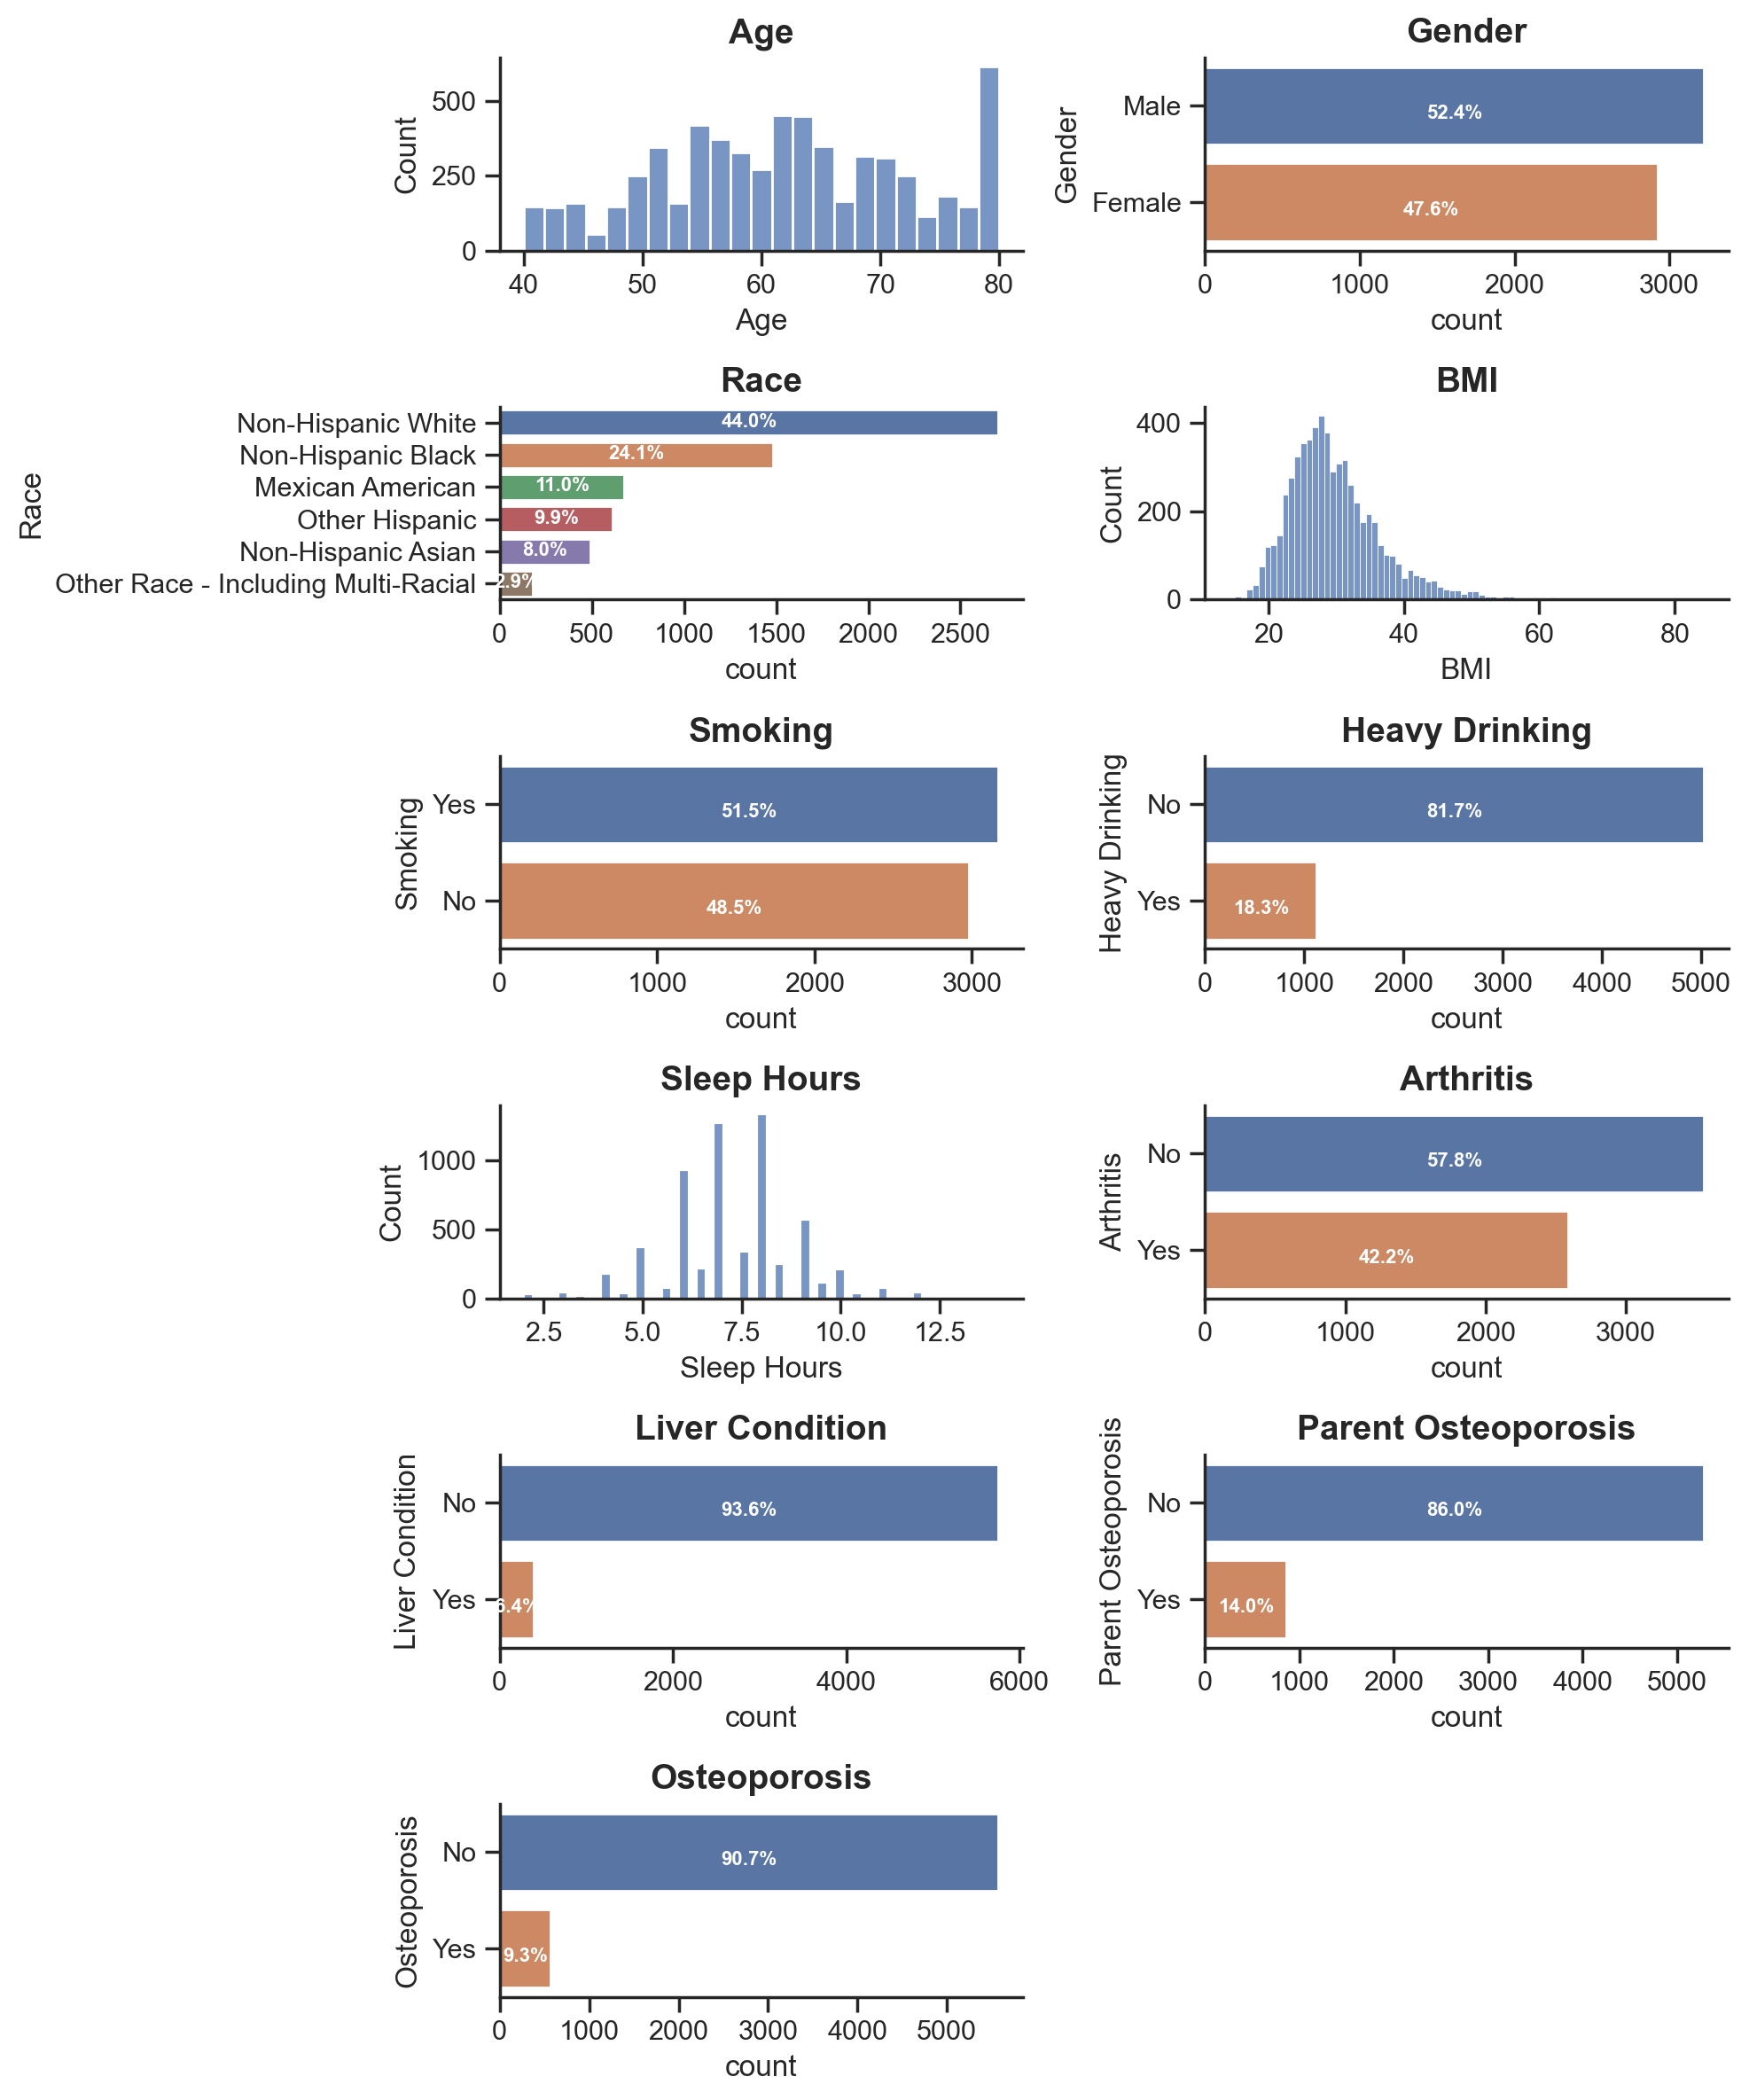

In [40]:
plt.figure(figsize=(10, 12))
multi_countplot(df_merged, var_list=df_merged.columns.tolist())

The dataset is highly imbalanced, the size of data with Osteoporosis vs. Non Osteoporosis is about 1:9, which may lead to lower sensitivity results in machine learning. We will need to handle the imbalanced data before training any models.

### 7.2 Osteoporosis by Gender

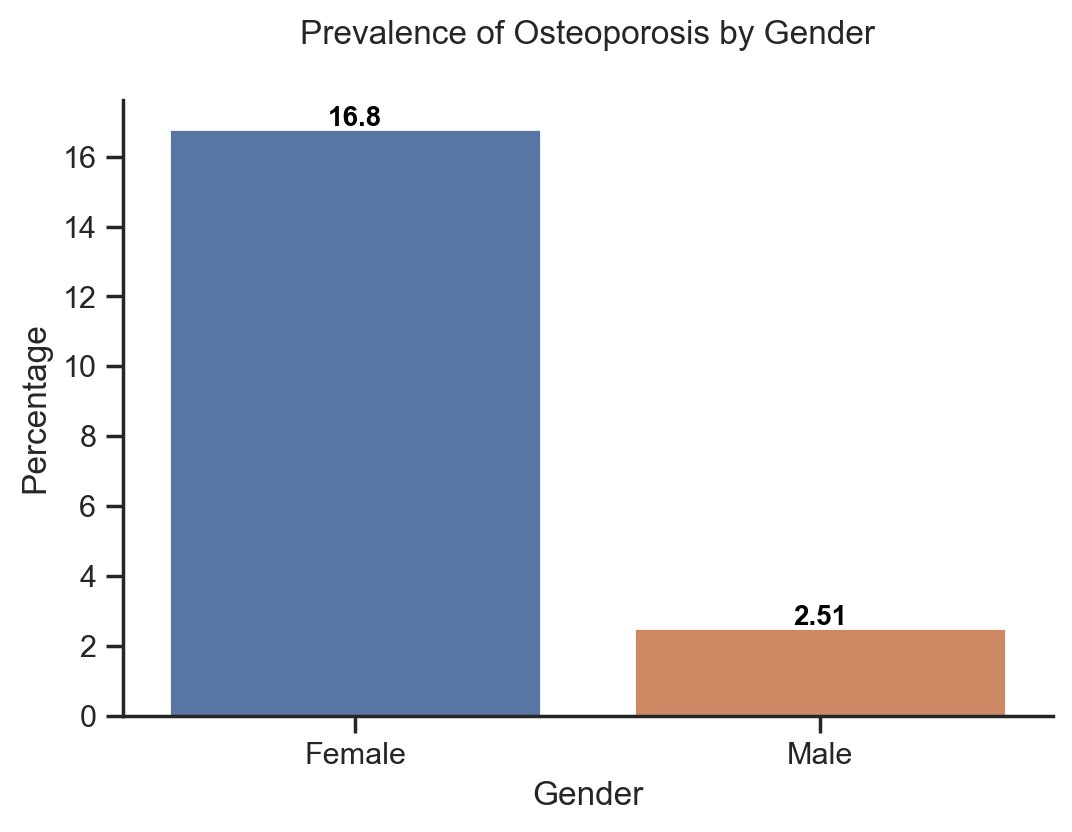

In [41]:
plt.figure(figsize=(6, 4))
barplot_percentage(df_merged, 
                   var_col='Gender', 
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Gender')
plt.show()

Women had 6.1 times the prevalence of osteoporosis compared to men.

### 7.3 Osteoporosis by Age

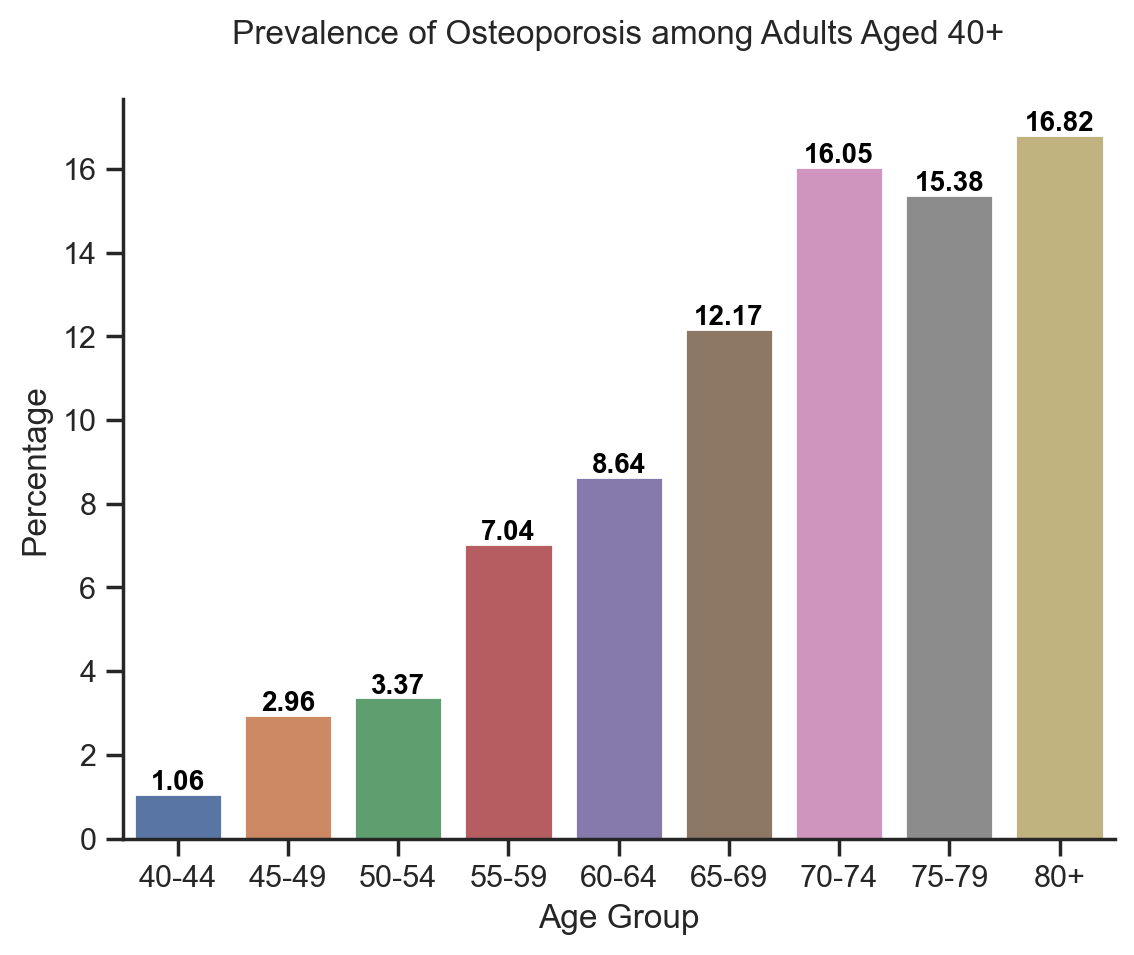

In [42]:
df_age_group = number_to_category(df_merged, var_col='Age', new_var_col='Age Group')
barplot_percentage(df_age_group, 
                   var_col='Age Group', 
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis among Adults Aged 40+')
plt.show()

The prevalence of osteoporosis increases with age.

### 7.4 Osteoporosis by Race

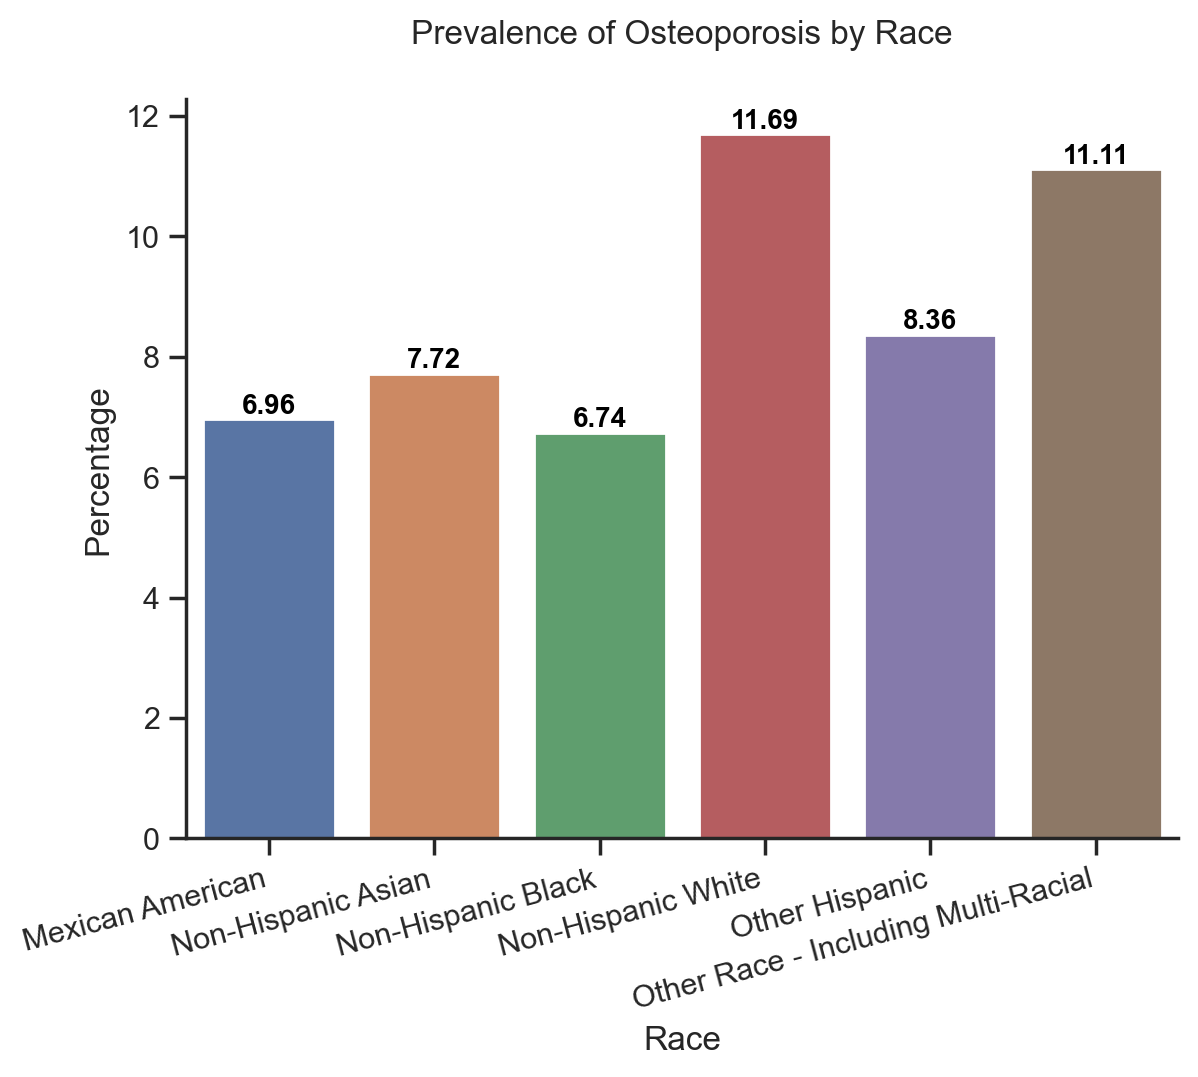

In [43]:
ax = barplot_percentage(df_merged, 
                   var_col='Race', 
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Race')
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, horizontalalignment='right')
plt.show()

### 7.5 Osteoporosis by BMI

According to [CDC](https://www.cdc.gov/obesity/basics/adult-defining.html), BMI can be interpreated to 4 groups: 
- Underweight (below 18.5)
- Healthy Weight (18.5 <= BMI < 25)
- Overweight (25.0 <= BMI < 30)
- Obesity (30.0 or higher)

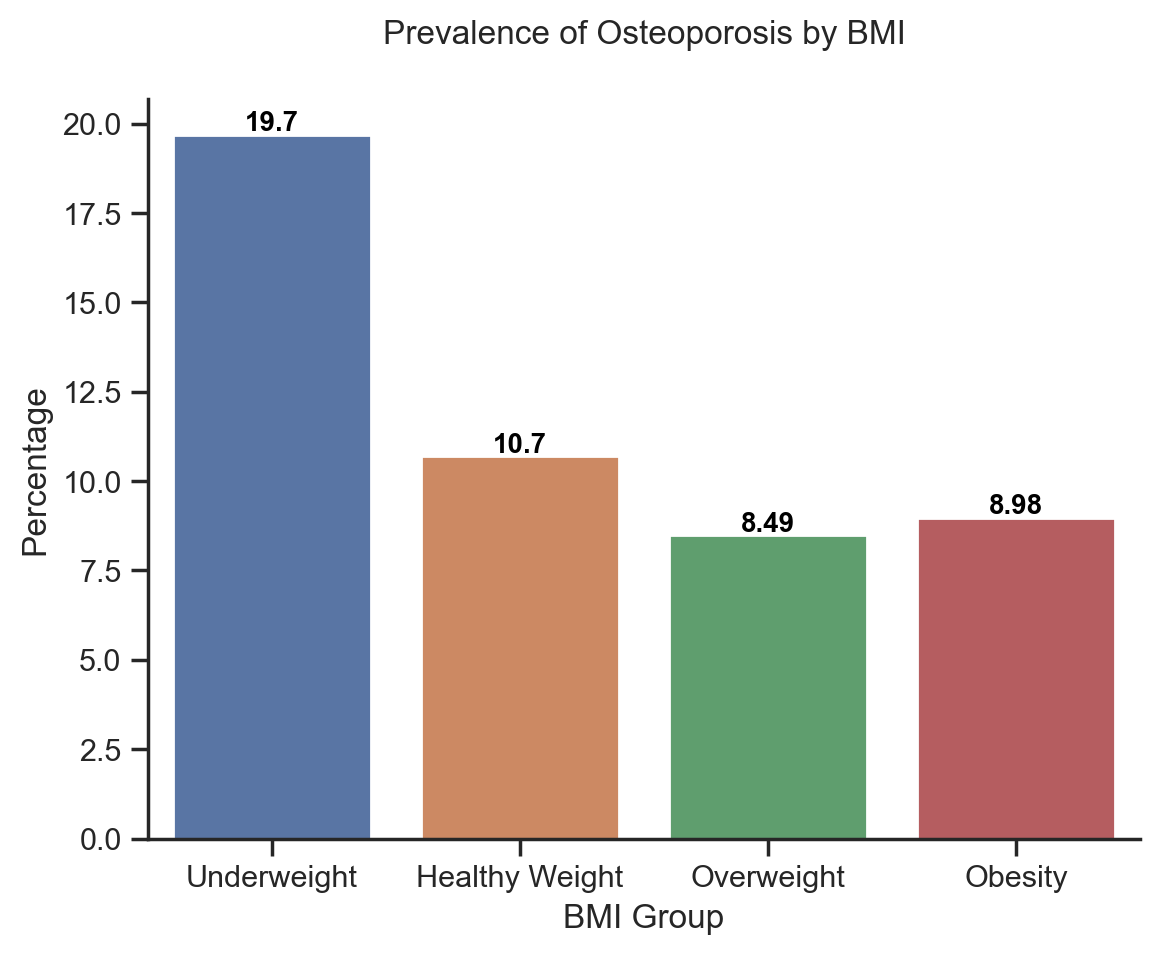

In [44]:
df_bmi_group = number_to_category(df_merged, var_col='BMI', new_var_col='BMI Group')
bmi_order = ['Underweight', 'Healthy Weight', 'Overweight', 'Obesity']
barplot_percentage(df_bmi_group,
                   var_col='BMI Group', 
                   target_col='Osteoporosis',
                   order = bmi_order,
                   title='Prevalence of Osteoporosis by BMI')
plt.show()

Osteoporosis was associated with underweight. Underweight people had 63% higher risk of Osteoporosis when compared to healthy weight people.

### 7.6 Osteoporosis by Alcohol

Alcohol data on "Heavy Drinking" are answers to the question "Ever have 4/5 or more drinks every day". According to the [National Institute on Alcohol Abuse and Alcoholism](https://www.niaaa.nih.gov/alcohol-health/overview-alcohol-consumption/moderate-binge-drinking), heavy drinking is defined as consuming more than 4 drinks on any day for men, or consuming more than 3 drinks on any day or women.

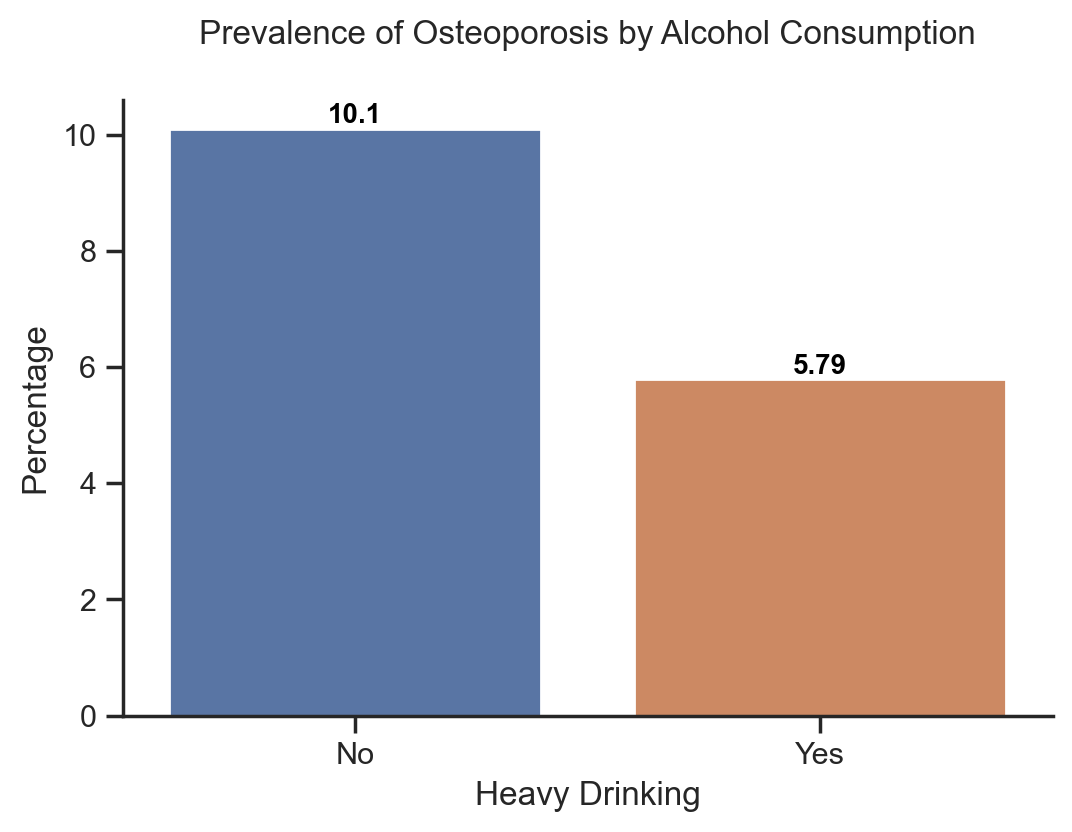

In [45]:
plt.figure(figsize=(6, 4))
barplot_percentage(df_merged,
                   var_col='Heavy Drinking',
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Alcohol Consumption'
                  )
plt.show()

The risk of getting osteoporosis for people who never had 4/5 or more drinks every day was 1.65 times the risk for those who ever had. This result is somewhat inconsistent with the common sense that alcohol is harmful to bone health. But we cannot draw any conclusion yet, further study about confounding effects is needed.

### 7.7 Osteoporosis by Smoking

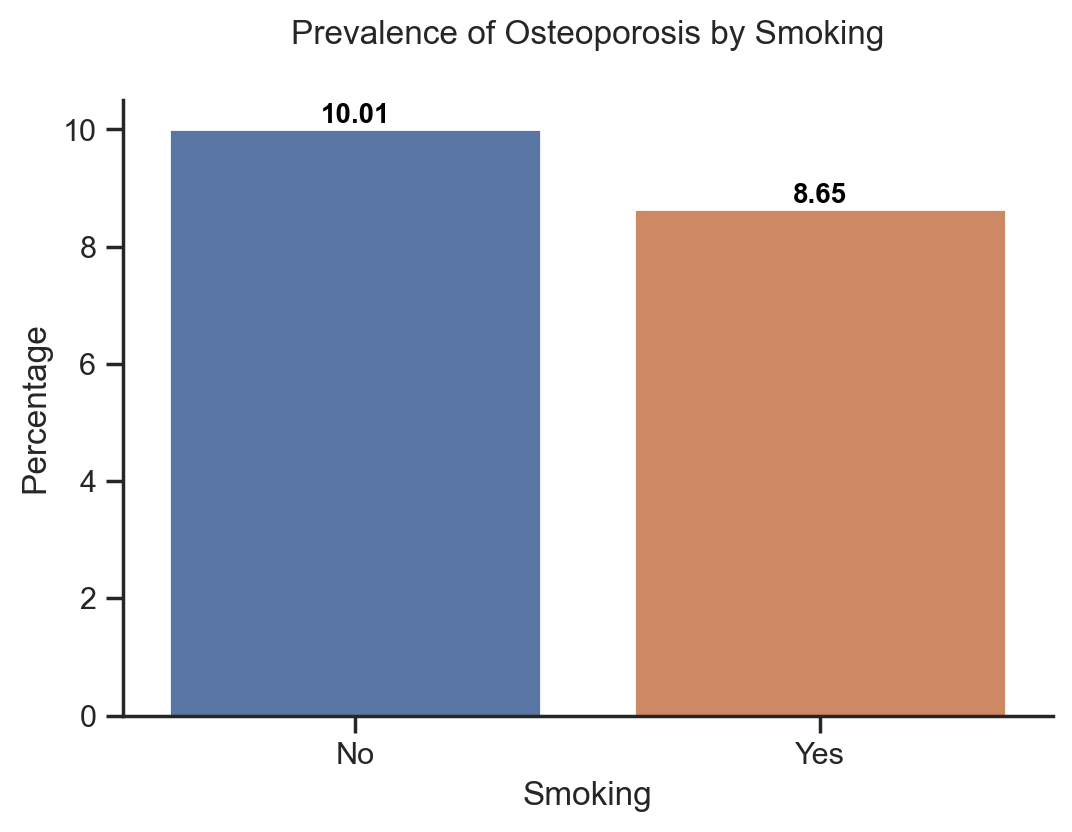

In [46]:
plt.figure(figsize=(6, 4))
barplot_percentage(df_merged,
                   var_col='Smoking',
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Smoking'
                  )
plt.show()

The risk for people who didn't smoke was 1.1 times the risk for those who smoked. Again, it's not the final conclusion, further study about confounding effects is needed.

### 7.8 Osteoporosis by Sleep Hours

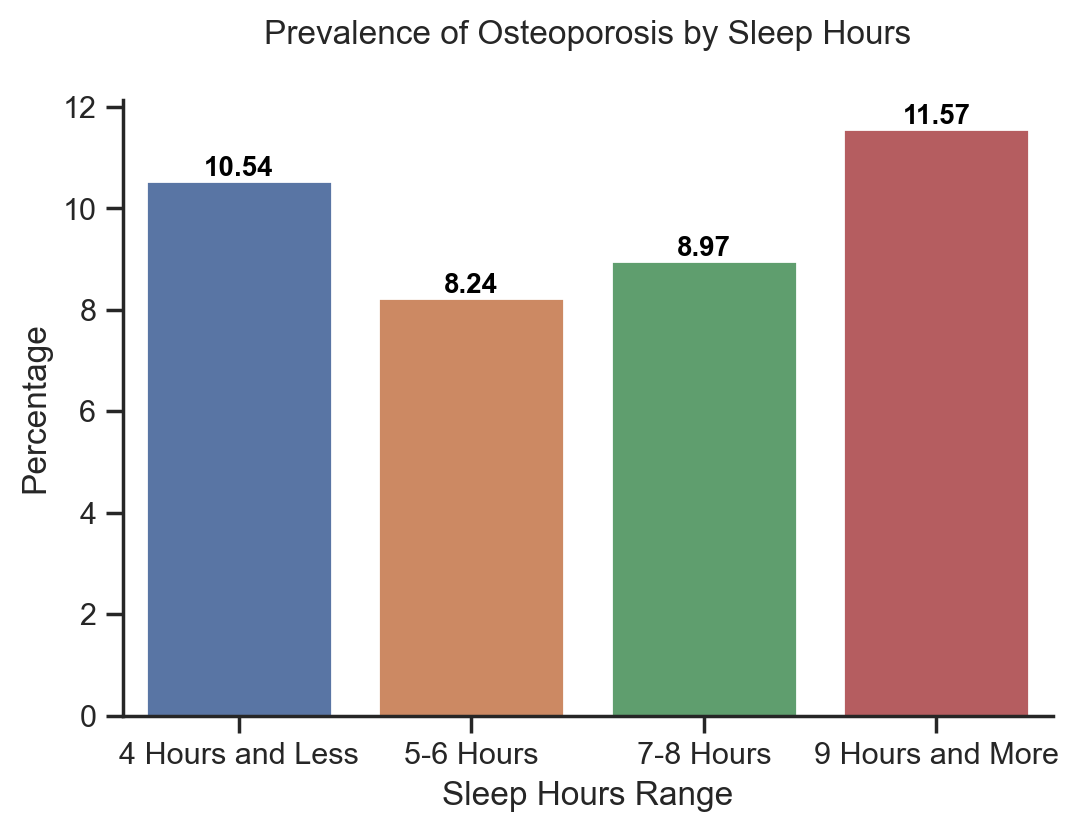

In [47]:
df_sleep_group = number_to_category(df_merged, var_col='Sleep Hours', new_var_col='Sleep Hours Range')
sleep_order = ['4 Hours and Less', '5-6 Hours', '7-8 Hours', '9 Hours and More']
plt.figure(figsize=(6, 4))
barplot_percentage(df_sleep_group, 
                   var_col='Sleep Hours Range', 
                   target_col='Osteoporosis',
                   order = sleep_order,
                   title='Prevalence of Osteoporosis by Sleep Hours')
plt.show()

### 7.9 By Arthritis

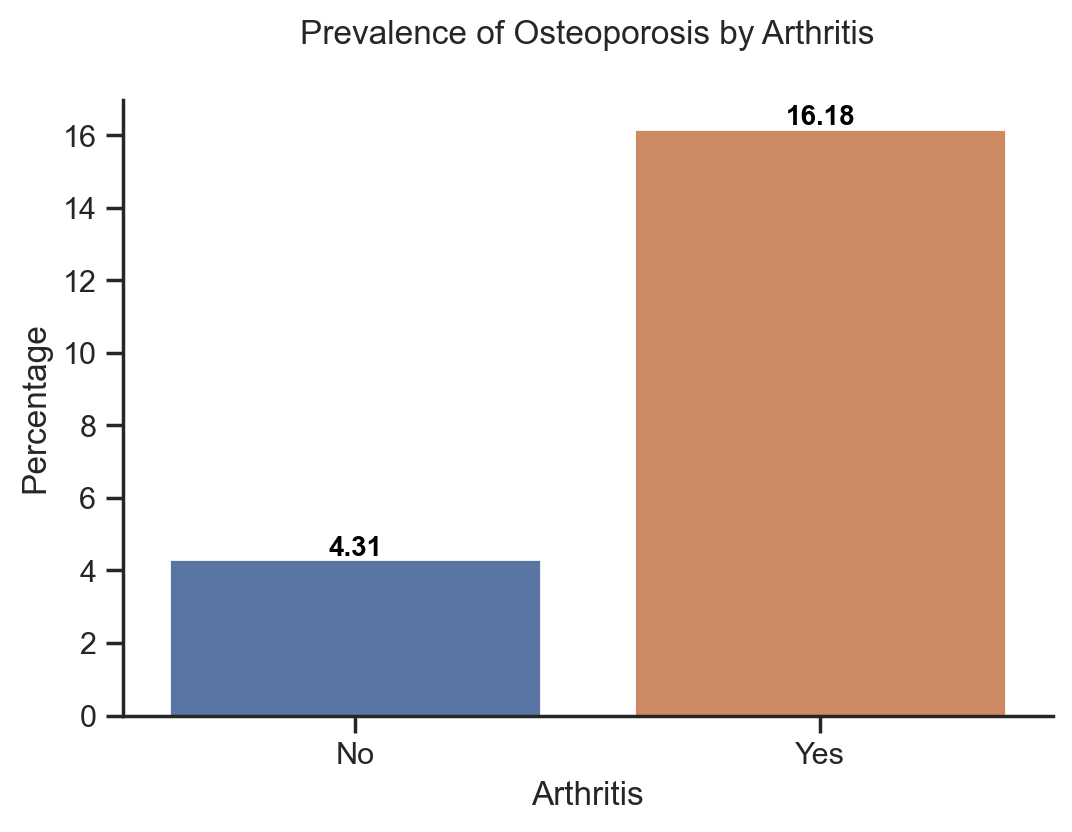

In [48]:
plt.figure(figsize=(6, 4))
barplot_percentage(df_merged,
                   var_col='Arthritis',
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Arthritis'
                  )
plt.show()

### 7.10 By Liver Condition

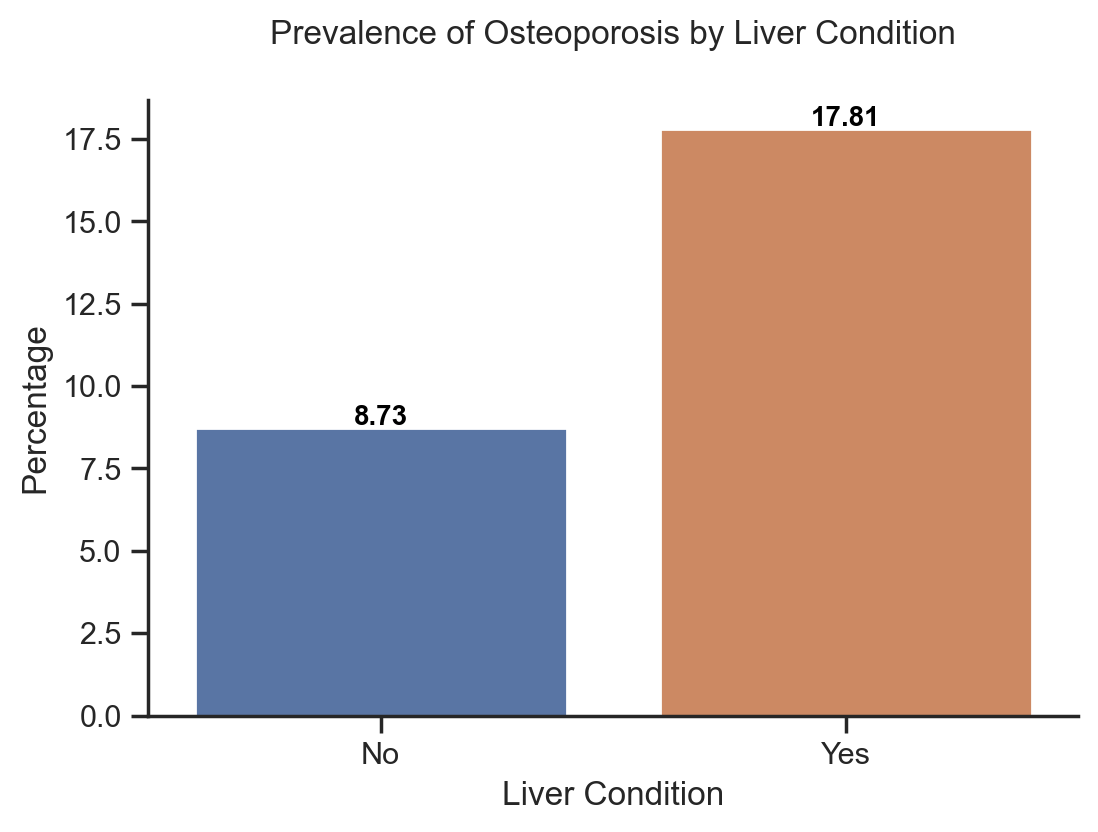

In [49]:
plt.figure(figsize=(6, 4))
barplot_percentage(df_merged,
                   var_col='Liver Condition',
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Liver Condition'
                  )
plt.show()

### 7.11 By Parent Osteoporosis

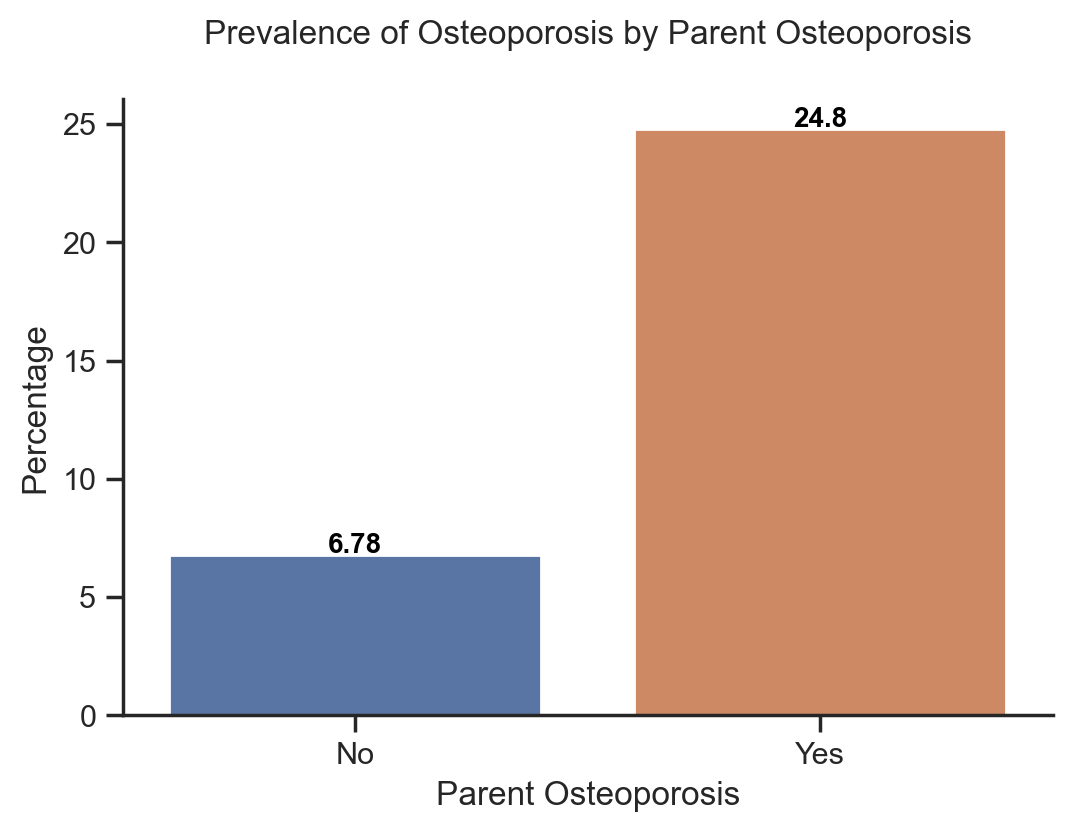

In [92]:
plt.figure(figsize=(6, 4))
barplot_percentage(df_merged,
                   var_col='Parent Osteoporosis',
                   target_col='Osteoporosis',
                   title='Prevalence of Osteoporosis by Parent Osteoporosis'
                  )
plt.show()

## 8. Feature Engineering

When there are many independent features, feature engineering may include removing some less useful features, which we are not going to do in this project. Because there are only 10 features, and each feature may have important practical significance. More specifically, in this project, feature engineering includes:
- Convert categorical variables to numbers so the data can be applied to machine learning algorithms
- Decide whether to select the numeric features `Age`, `BMI`, `Sleep Hours`, or the corresponding binned features (age group, bmi group, and sleep hours group) as shown in EDA.

### 8.1 Categorical Encoding

Before applying any machine learning algorithm, we need to convert categorical variables into numbers, this process is called categorical encoding. We will need to combine [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) (for nominal categories) and [`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) (for ordinal categories) to encode the dataset.

In [52]:
def one_hot_encode(data):
    cate_list = list(data.select_dtypes(include=['category', 'object']).columns)
    data_encoded = pd.get_dummies(data, columns=cate_list, prefix_sep='_')
    # drop columns end with '_No'
    data_encoded = data_encoded[data_encoded.columns.drop(list(data_encoded.filter(regex='_No$')))]
    # remove '_Yes', 'Gender_', and 'Race_' from column names
    data_encoded.columns = data_encoded.columns.str.replace("_Yes|Gender_|Race_", "")
    # drop redundant columns to reduce the impact of multicollinearity
    data_encoded = data_encoded.drop(columns=['Male', 'Other Race - Including Multi-Racial'])
    
    return data_encoded

def convert_age(data):
    group = 1
    for x in range(45, 80, 5):
        group += 1
        if x <= data <= x+4:
             return group
    return 0
                 
def convert_bmi(data):
    group = 1
    if 18.5 <= data < 25:
        group = 2
    if 25 <= data < 30:
        group = 3
    if data >= 30:
        group = 4
        
    return group

def convert_sleep_hours(data):
    group = 1
    if data > 4 and data <= 6:
        group = 2
    if data > 6 and data <= 8:
        group = 3
    if data > 8:
        group = 4
        
    return group

df_ohe = one_hot_encode(df_merged)
df_ohe['Age Group'] = df_merged['Age'].apply(convert_age)
df_ohe['BMI Group'] = df_merged['BMI'].apply(convert_bmi)
df_ohe['Sleep Hours Group'] = df_merged['Sleep Hours'].apply(convert_sleep_hours)


df_ohe.head()

,Age,BMI,Sleep Hours,Female,Mexican American,Non-Hispanic Asian,Non-Hispanic Black,Non-Hispanic White,Other Hispanic,Smoking,Heavy Drinking,Arthritis,Liver Condition,Parent Osteoporosis,Osteoporosis,Age Group,BMI Group,Sleep Hours Group
0,69.0,26.7,7.0,0,0,0,1,0,0,1,1,1,0,0,0,6,3,3
1,54.0,28.6,9.0,0,0,0,0,1,0,1,1,0,0,0,0,3,3,4
2,72.0,28.9,8.0,0,0,0,0,1,0,1,0,0,0,0,1,7,3,3
4,73.0,19.7,9.0,1,0,0,0,1,0,0,0,1,0,0,0,7,2,4
5,56.0,41.7,5.0,0,1,0,0,0,0,1,0,1,0,0,0,4,4,2


### 8.2 Mutual Information

We can select featues according to the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) score. A higher score indicates a stronger connection between the feature and the target, while a low score (closer to 0) indicates a weaker connection between the feature and the target.

In [53]:
# get mutual information scores
mi_scores = make_mi_scores(data=df_ohe, target_name="Osteoporosis")
mi_scores

Female                 0.032723
Arthritis              0.020384
Age                    0.019654
Parent Osteoporosis    0.017911
Age Group              0.010587
Non-Hispanic White     0.002607
Liver Condition        0.002407
Heavy Drinking         0.001818
Non-Hispanic Black     0.001325
Sleep Hours Group      0.001181
BMI Group              0.000951
Mexican American       0.000433
Smoking                0.000270
Non-Hispanic Asian     0.000136
Other Hispanic         0.000061
BMI                    0.000000
Sleep Hours            0.000000
Name: MI Scores, dtype: float64

`Age Group` has lower score than `Age`. while `Sleep Hours Group` and `BMI Group` have higher mutual information scores than the original feature. Therefore we can remove `BMI` and `Sleep Hours` and keep the 2 binning features.

In [54]:
# keep Age, BMI Group, Sleep Hours Group, delete Age Group, BMI, and Sleep Hours
df_ohe = df_ohe.drop(columns=['Age Group', 'BMI', 'Sleep Hours'])

### 8.3 Correlation Matrix

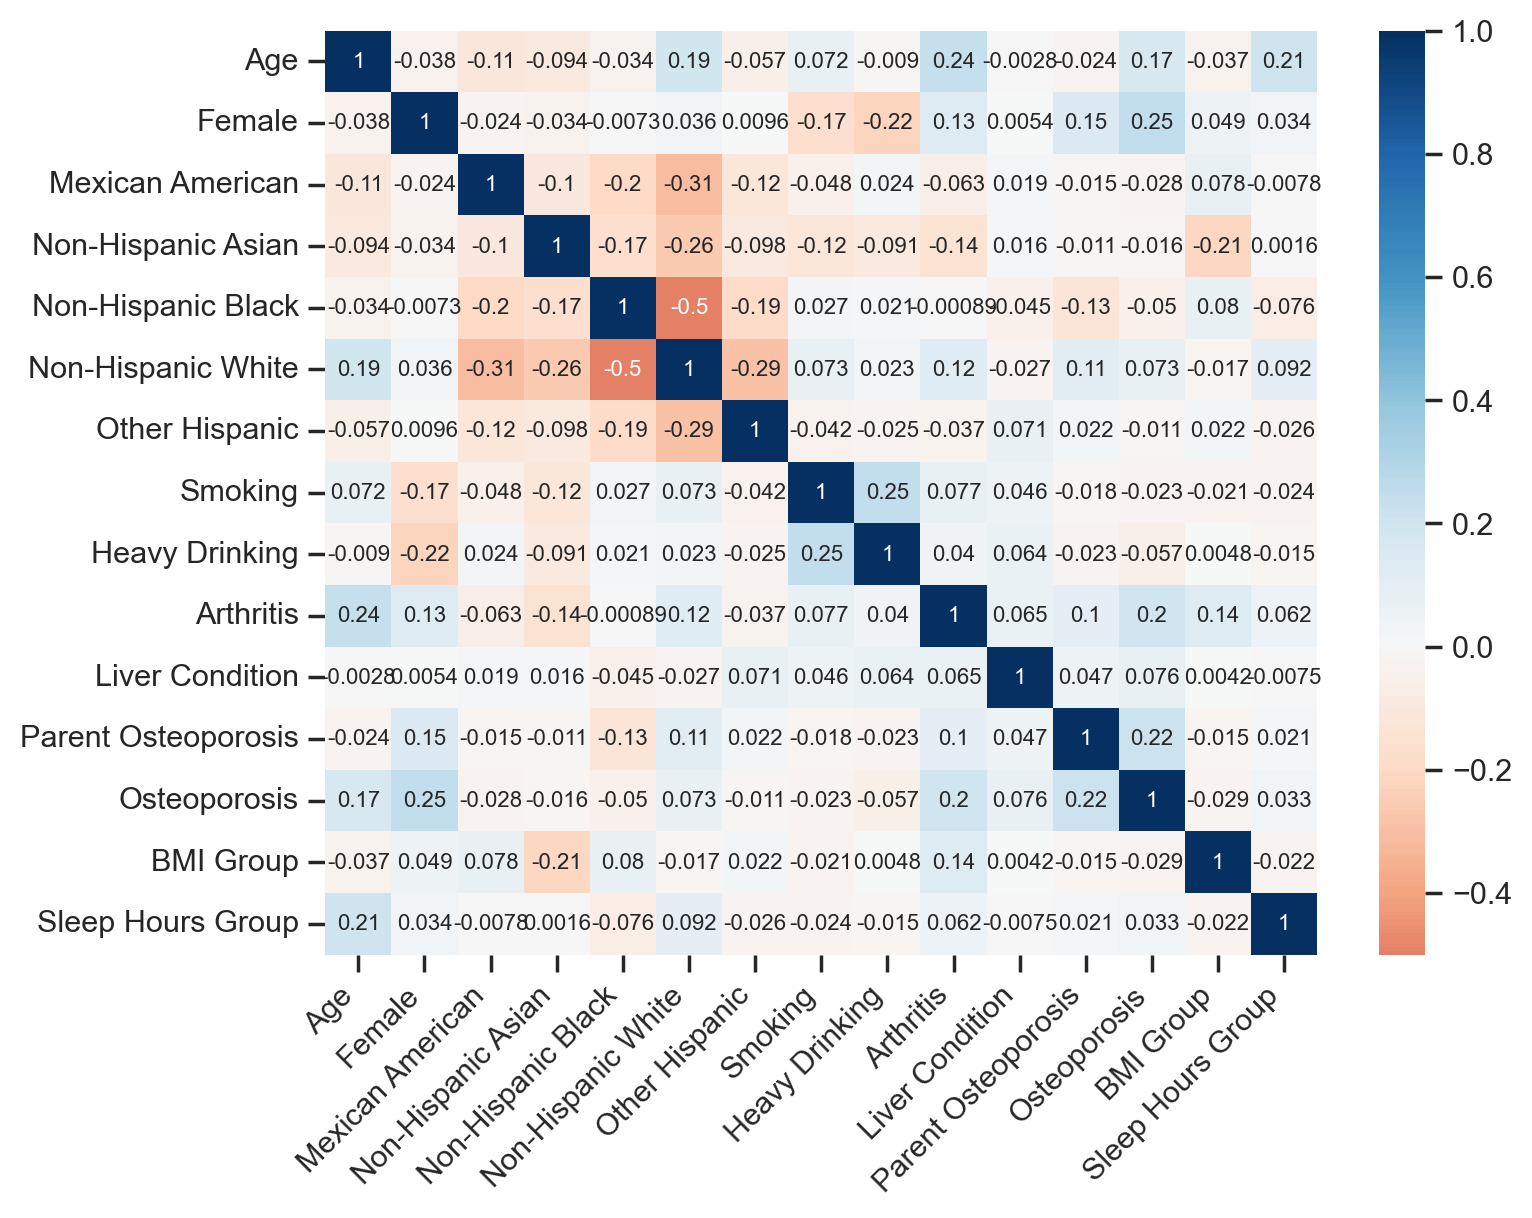

In [55]:
plt.figure(figsize=(8, 6))
chart = sns.heatmap(data=df_ohe.corr(), annot=True, annot_kws={"fontsize":8}, center=0, cmap="RdBu")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

According to the heatmap, "Age", "Female", "Arthritis", and "Parent Osteoporosis" might be weakly associated with osteoporosis, which in line with what we've observed in EDA.

## 9. Prepare Training and Testing Dataset

### 9.1 Addressing Imbalanced Data

We've known the dataset is imbalanced (with Osteoporosis: 9.9%). The problem of imbalanced data is that most machine learning might ignore the minority class and get poor performance on it. 
There are multiple options for addressing imbalanced data (refer [wiki](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis)):
- **Undersampling**: such as Random undersampling, Cluster, Tomek links, EditedNearestNeighbours (ENN)
- **Oversampling**: such as Random oversampling, Adaptive Synthetic Sampling Approach (ADASYN), Synthetic Minority Oversampling (SMOTE)
- **Combination of undersampling and oversampling**: such as SMOTETomek (SMOTE plus TomekLinks)
, SMOTEENN (SMOTE plus ENN)

The major drawback of undersampling is that it can discard potentially useful data, which could be important for the induction process (refer [Class Imbalance Ensemble Learning Based on the Margin Theory](https://www.mdpi.com/2076-3417/8/5/815)). Therefore we're not going to use any undersampling.

Oversampling does not cause any loss of information, and in some cases, may perform better than undersampling. But oversampling often involves duplicating a small number of events, which leads to overfitting. To balance these concerns, some scenarios may require a combination of the two to obtain the most realistic dataset and accurate results.

Let's compare 2 oversampling and 1 combination techniques: [ADASYN](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html?highlight=adasyn), [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), [SMOTETomek](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html) by one of the most popular algorithm, logistic regression, to decide the sampling technique for this project. 

#### 9.1.1 Split train and test data

In [56]:
# get train and test dataset
# standardize train dataset
(
    X_train_ss,
    X_test_ss,
    y_train,
    y_test
) = train_test_standardscaler(
    df_ohe, target_name="Osteoporosis", test_size=0.2, random_state=42
)

#### 9.1.2 Select oversampling method

Let's compare their performance metrics and select the one with highest F1 score.

In [57]:
# define the oversampling methods and sampling strategies
oversampling_methods = [ADASYN, SMOTE, SMOTETomek]
# resample all classes but the majority class
sampling_strategy = 'not majority'

# compare their performance metrics by Logistic Regression, one of the most common and easy to use classifiers
scores, results = compare_oversampling_performance(X_train=X_train_ss,
                                          y_train=y_train,
                                          X_test=X_test_ss,
                                          y_test=y_test,
                                          model=LogisticRegression,
                                          oversampling_methods=oversampling_methods, 
                                          sampling_strategy=sampling_strategy)

# show the 5 key metrics
performance_metrics = scores[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']] 
performance_metrics = performance_metrics.sort_values(by=['F1 Score', 'Recall'], ascending=False)
performance_metrics

,Accuracy,Precision,Recall,F1 Score,AUC
Model_Name,,,,,
LogisticRegression (ADASYN),0.765,0.260,0.833,0.397,0.864
LogisticRegression (SMOTE),0.778,0.265,0.789,0.397,0.866
LogisticRegression (SMOTETomek),0.777,0.263,0.781,0.394,0.866
Original Data,0.910,0.552,0.140,0.224,0.869


Compared to the original data, we can see a significant increase in recall and F1-score with any sampling technique, despite a decrease in precision and accuracy. Given the importance of predicting the presence of osteoporosis, oversampling remains beneficial.

As we can seen from the above table, some oversampler have higher precision while the others have higher recall. To balance the 2 metrics, let's select oversampler based on F1 Score as it takes both precision and recall into account.

As a result, **ADASYN** performs the best with highest F1 score and Recall. Let's use it as the method for handling imbalanced data in this study.

In [58]:
# get the index of the oversampler that with highest F1
best_oversampler_index = performance_metrics.head(1).index.values[0]
best_oversampler_results = results[best_oversampler_index]
lr_model = best_oversampler_results["model"]
lr_cf_matrix = best_oversampler_results["confusion_matrix"]
y_test_predict_probs_lr = best_oversampler_results["test_predict_probs"]

X_train_oversample = best_oversampler_results["X_train"]
y_train_oversample = best_oversampler_results["y_train"]

# data shapes
print('====== Original ========\n')
print(f'the shape of X_train is: {X_train_ss.shape}')
print(f'the shape of y_train is: {y_train.shape}')
print(f'the shape of X_test is: {X_test_ss.shape}')
print(f'the shape of y_test is: {y_test.shape}')

print('\n====== After oversampling ========\n')
print(f'the shape of X_train is: {X_train_oversample.shape}')
print(f'the shape of y_train is: {y_train_oversample.shape}')
print("y_train before oversampling: ", Counter(y_train))
print("y_train after oversampling: ", Counter(y_train_oversample))

====== Original ========

the shape of X_train is: (4915, 14)
the shape of y_train is: (4915,)
the shape of X_test is: (1229, 14)
the shape of y_test is: (1229,)

====== After oversampling ========

the shape of X_train is: (8959, 14)
the shape of y_train is: (8959,)
y_train before oversampling:  Counter({0: 4457, 1: 458})
y_train after oversampling:  Counter({1: 4502, 0: 4457})


After oversampling, the sample size of minority (with osteoporosis) is almost equal to the size of majority (no osteoporosis).

Next, let's benchmark 4 popular classification models and find the optimal one.

## 10. Logistic Regression

The previous results already contain the best performance metrics of Logistic Regression, now let's visualize them.

### 10.1 Model Evaluation

**Confusion Matrix**

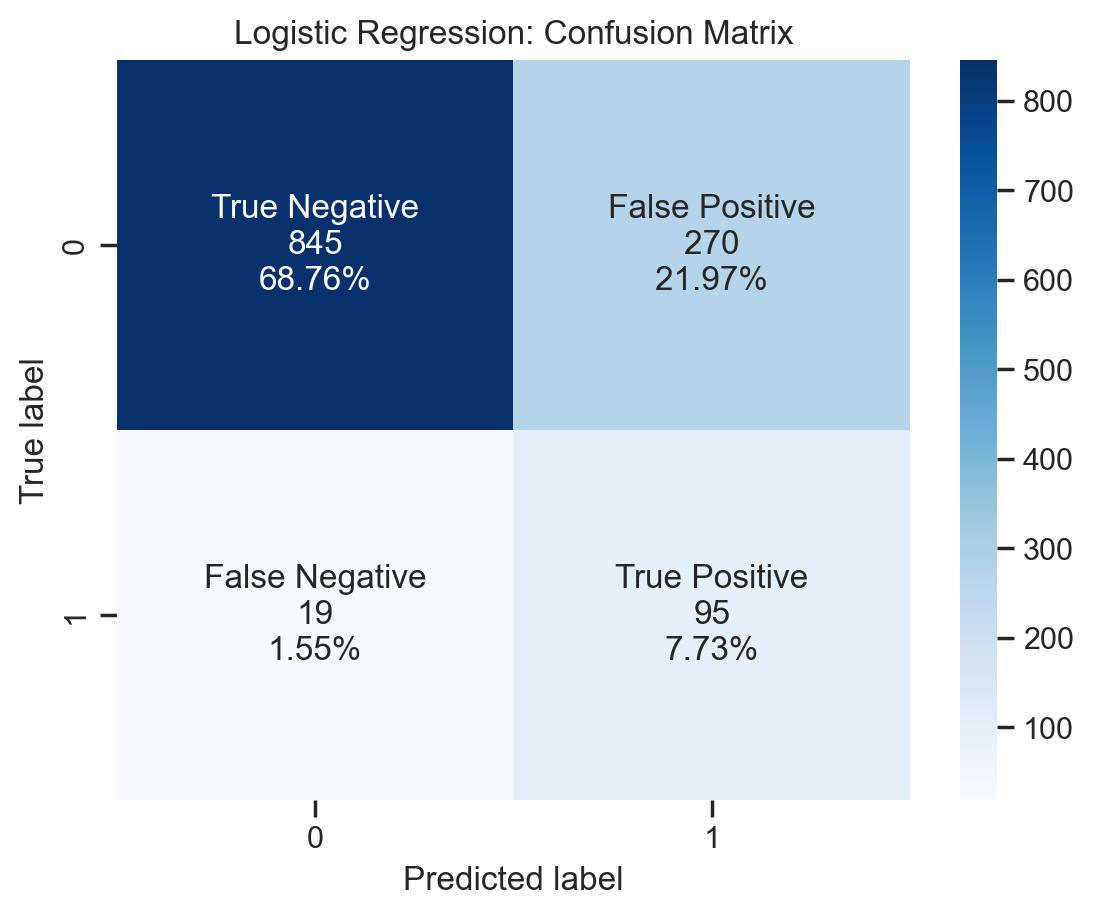

In [59]:
plot_cf_matrix(lr_cf_matrix, model_name="Logistic Regression")
plt.show()

**AUC**

No Skill: ROC AUC=0.5
Logistic Regression: ROC AUC=0.864


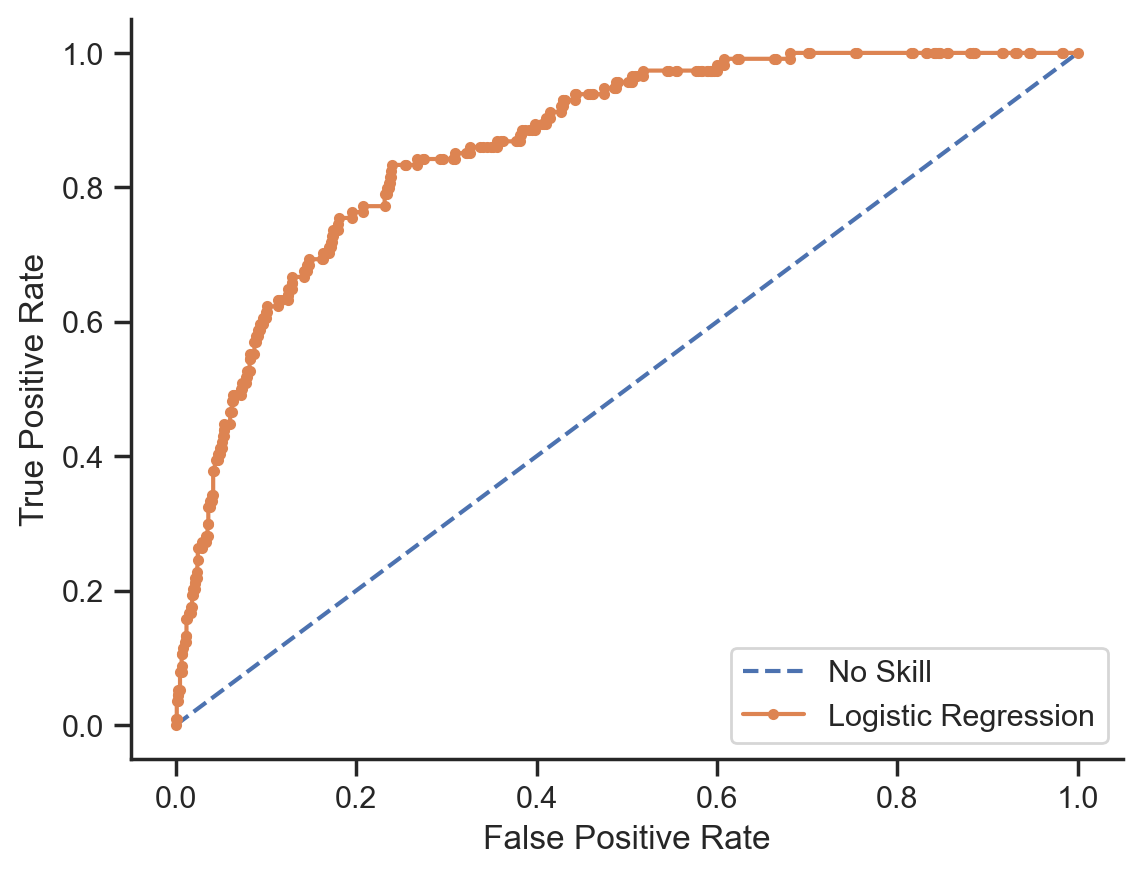

In [60]:
lr_auc, lr_roc_plot = plot_auc(y_test, y_test_predict_probs_lr, model_name="Logistic Regression")

**Performance Metrics**

In [61]:
lr_scores = performance_metrics.head(1)
lr_scores

,Accuracy,Precision,Recall,F1 Score,AUC
Model_Name,,,,,
LogisticRegression (ADASYN),0.765,0.26,0.833,0.397,0.864


### 10.2 Feature Importance

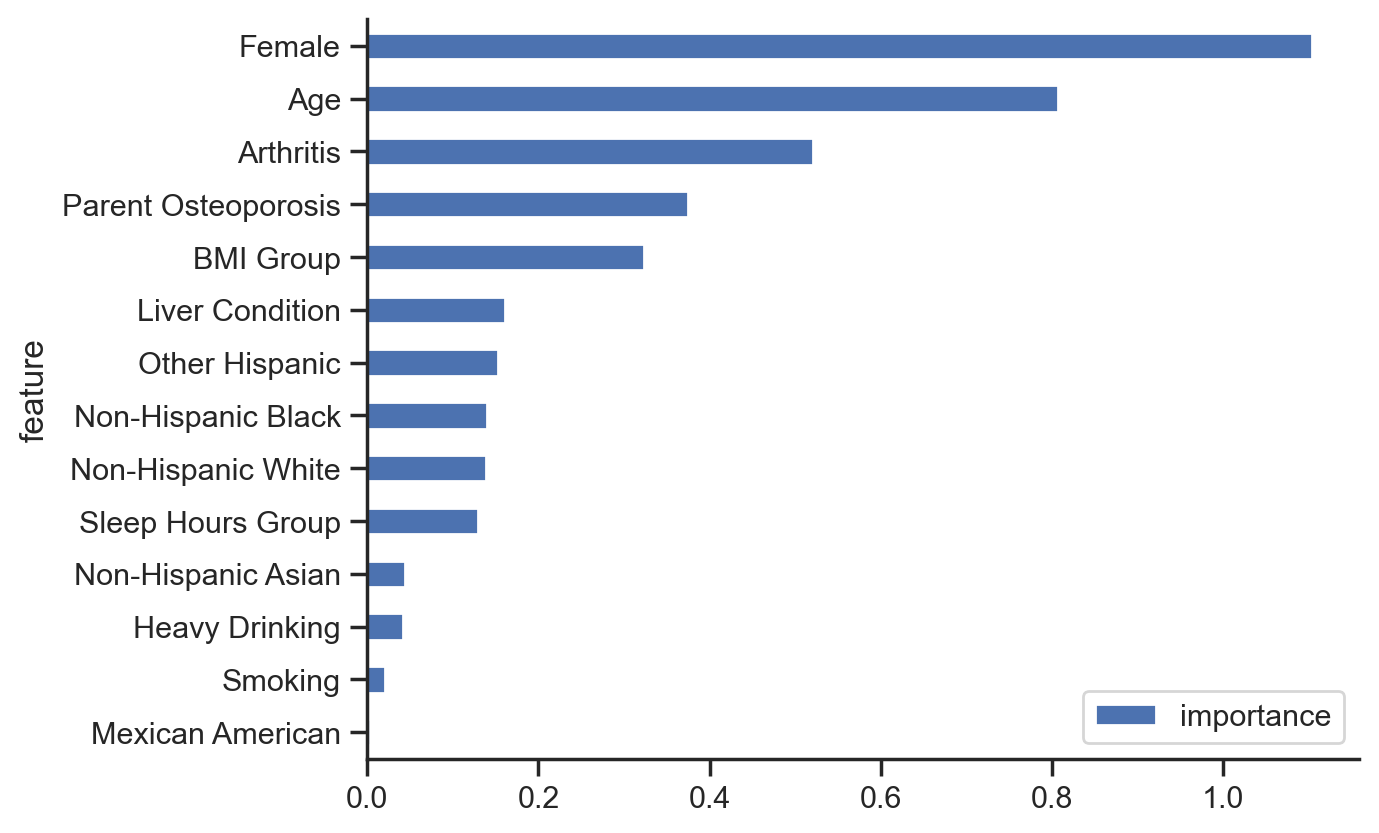

In [62]:
features = X_train_oversample
feature_importance=pd.DataFrame({'feature':list(features.columns),
                                 'importance':[abs(i) for i in lr_model.coef_[0]]})
feature_importance = feature_importance.sort_values('importance',ascending=True)
                               
feature_importance.plot.barh(x='feature', y='importance') 
plt.show()

Gender (Female) is the most important feature to predict osteoporosis, followed by age and arthritis.

## 11. Support Vector Machine
### 11.1 Training and Prediction

In [63]:
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_oversample, y_train_oversample)
y_test_predict_svm = svm_model.predict(X_test_ss)

### 11.2 Model Evaluation

**Confusion Matrix**

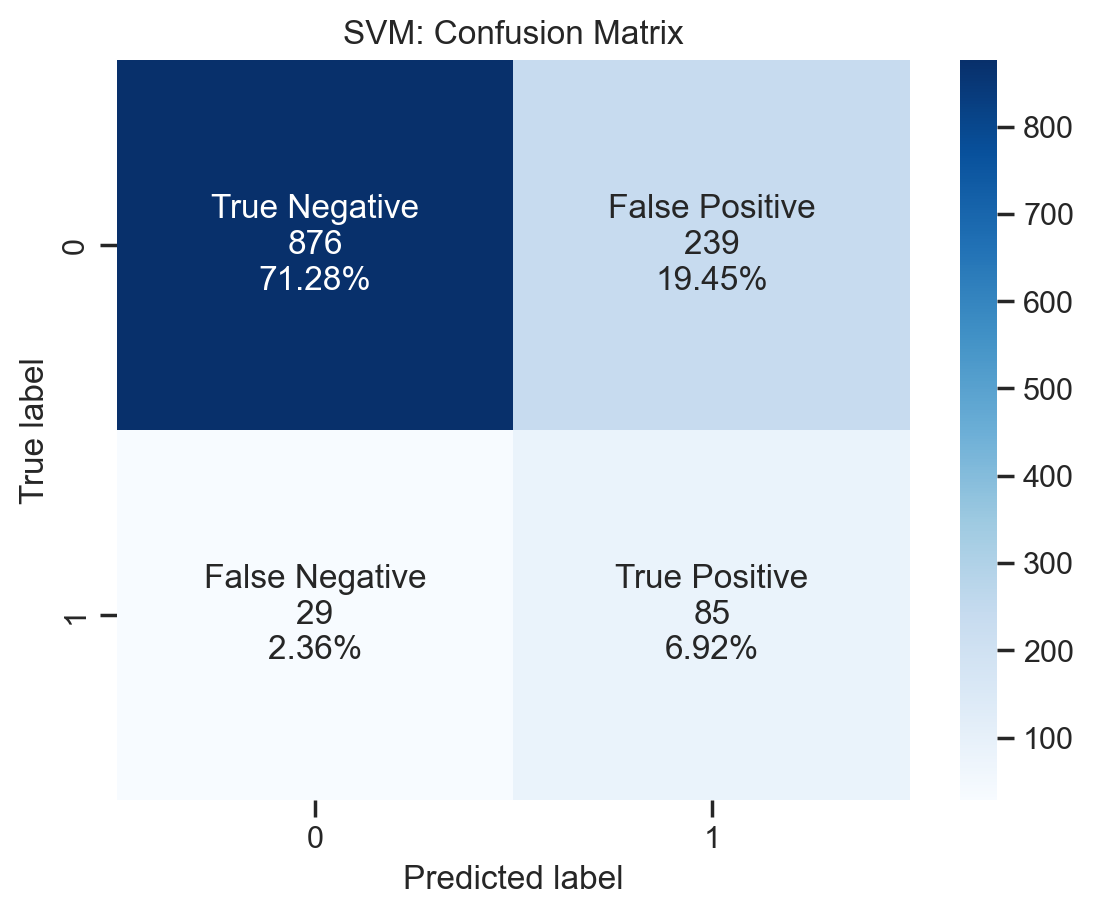

In [64]:
svm_cf_matrix = confusion_matrix(y_test, y_test_predict_svm)
plot_cf_matrix(svm_cf_matrix, model_name="SVM")
plt.show()

**AUC**

No Skill: ROC AUC=0.5
SVM: ROC AUC=0.821


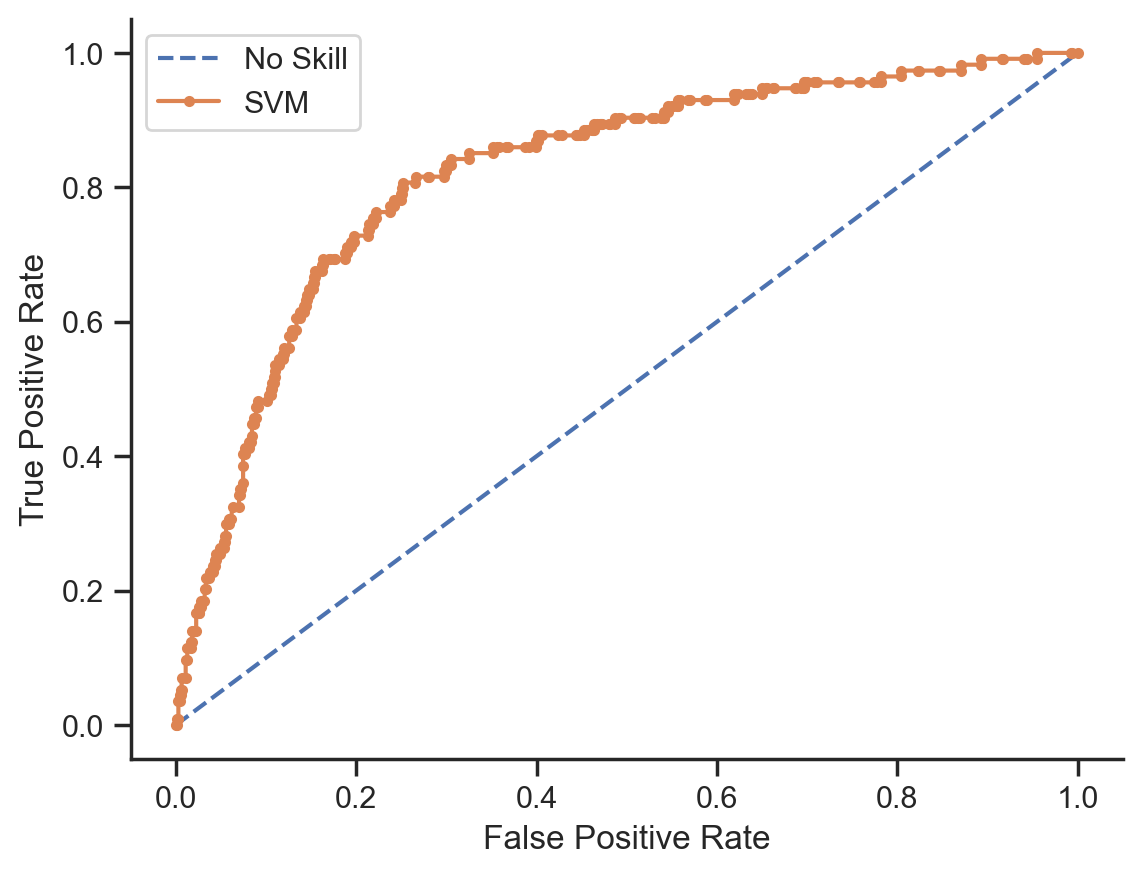

In [65]:
y_test_predict_probs_svm = get_predict_proba(svm_model, X_test_ss)
svm_auc, svm_roc_plot = plot_auc(y_test, y_test_predict_probs_svm, model_name="SVM")

**Performance Metrics**

In [66]:
# precision, accuracy, f1-score, and AUC
svm_model_scores = binary_classification_scores(svm_cf_matrix, 
                                                auc=svm_auc, 
                                                model_name='SVM')
svm_model_scores

,Accuracy,Precision,Recall,F1 Score,AUC
Model_Name,,,,,
SVM,0.782,0.262,0.746,0.388,0.821


## 12. Random Forest

### 12.1 Training and Prediction

In [67]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_oversample, y_train_oversample)
y_test_predict_rf = rf_model.predict(X_test_ss)

### 12.2 Model Evaluation

**Confusion Matrix**

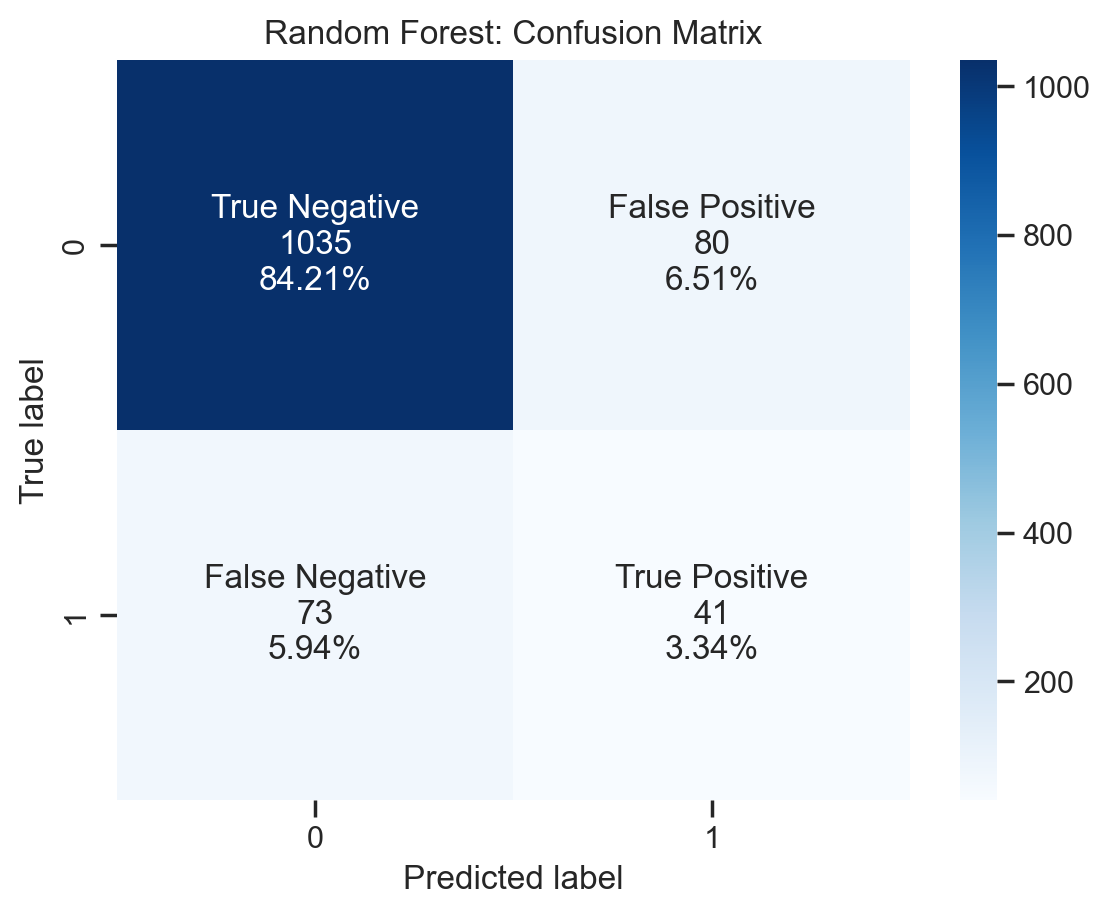

In [68]:
rf_cf_matrix = confusion_matrix(y_test, y_test_predict_rf)
plot_cf_matrix(rf_cf_matrix, model_name="Random Forest")
plt.show()

**AUC**

No Skill: ROC AUC=0.5
Random Forest: ROC AUC=0.807


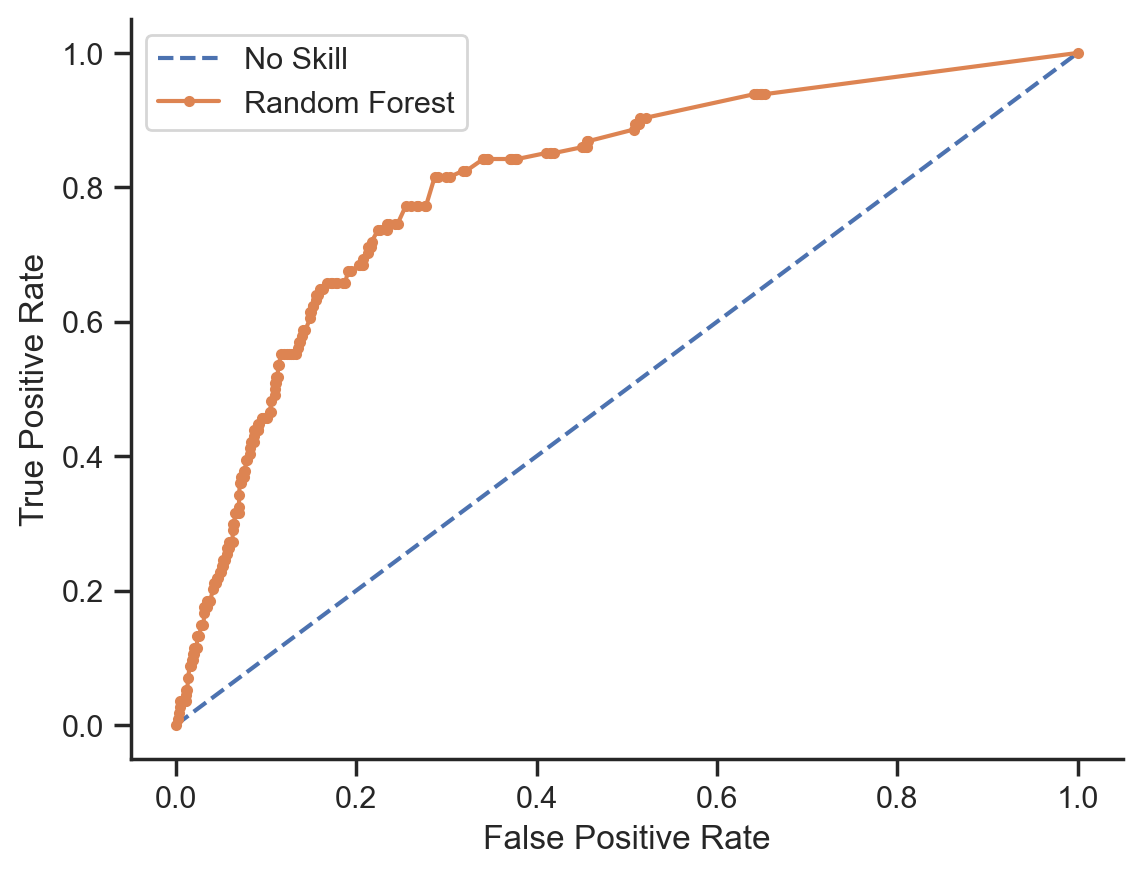

In [69]:
y_test_predict_probs_rf = get_predict_proba(rf_model, X_test_ss)
rf_auc, rf_roc_plot = plot_auc(y_test, y_test_predict_probs_rf, model_name="Random Forest")

**Performance Metrics**

In [70]:
# precision, accuracy, f1-score, and AUC
rf_model_scores = binary_classification_scores(rf_cf_matrix,
                                               auc=rf_auc,
                                               model_name='Random Forest')
rf_model_scores

,Accuracy,Precision,Recall,F1 Score,AUC
Model_Name,,,,,
Random Forest,0.876,0.339,0.36,0.349,0.807


## 13. Neural Networks

Let's first try a shallow neural network with only one hidden layer. According to book [*From Introduction to Neural Networks for Java (second edition) - Chapter 5*](https://books.google.it/books?id=Swlcw7M4uD8C) by Jeff Heaton :
> There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:
> 1. The number of hidden neurons should be between the size of the input layer and the size of the output layer.
> 2. The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
> 3. The number of hidden neurons should be less than twice the size of the input layer. 

To start from a simple neural networks model, let's set 1 hidden layer with 6 (rule 1, between the size of the input layer 14 and the size of the output layer 1)

### 13.1 Train the Model

In [71]:
# set seed
np.random.seed(42)
tf.random.set_seed(42)

nn_model = Sequential(
    [      
        # the input, layer 0
        tf.keras.Input(shape=(14,)),
        # hidden layer
        Dense(units=6, name="l1", activation="relu"),
        # the output layer, use linear activation here and set from_logits=True in
        # BinaryCrossentropy to get numerically accurate results 
        Dense(units=1, name="l2", activation="linear")
    ], name = "nn_model" 
)
nn_model.summary()

Model: "nn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l1 (Dense)                  (None, 6)                 90        
                                                                 
 l3 (Dense)                  (None, 1)                 7         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


2023-03-15 15:25:24.446680: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [72]:
nn_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.0001),
)

history = nn_model.fit(X_train_oversample, 
                       y_train_oversample, 
                       epochs=100, 
                       batch_size=20, 
                       validation_split=0.2)

Epoch 1/100
359/359 [==============================] - 1s 2ms/step - loss: 0.6581 - val_loss: 0.9814
Epoch 2/100
359/359 [==============================] - 1s 2ms/step - loss: 0.6310 - val_loss: 0.9264
Epoch 3/100
359/359 [==============================] - 1s 2ms/step - loss: 0.6096 - val_loss: 0.8865
Epoch 4/100
359/359 [==============================] - 1s 2ms/step - loss: 0.5920 - val_loss: 0.8565
Epoch 5/100
359/359 [==============================] - 1s 2ms/step - loss: 0.5770 - val_loss: 0.8320
Epoch 6/100
359/359 [==============================] - 1s 2ms/step - loss: 0.5639 - val_loss: 0.8129
Epoch 7/100
359/359 [==============================] - 1s 2ms/step - loss: 0.5522 - val_loss: 0.7948
Epoch 8/100
359/359 [==============================] - 1s 2ms/step - loss: 0.5416 - val_loss: 0.7822
Epoch 9/100
359/359 [==============================] - 1s 1ms/step - loss: 0.5324 - val_loss: 0.7697
Epoch 10/100
359/359 [==============================] - 1s 2ms/step - loss: 0.5242 - val_lo

359/359 [==============================] - 1s 2ms/step - loss: 0.4389 - val_loss: 0.7193
Epoch 82/100
359/359 [==============================] - 1s 2ms/step - loss: 0.4387 - val_loss: 0.7199
Epoch 83/100
359/359 [==============================] - 1s 2ms/step - loss: 0.4384 - val_loss: 0.7187
Epoch 84/100
359/359 [==============================] - 1s 3ms/step - loss: 0.4382 - val_loss: 0.7189
Epoch 85/100
359/359 [==============================] - 1s 2ms/step - loss: 0.4380 - val_loss: 0.7182
Epoch 86/100
359/359 [==============================] - 1s 2ms/step - loss: 0.4377 - val_loss: 0.7186
Epoch 87/100
359/359 [==============================] - 1s 2ms/step - loss: 0.4375 - val_loss: 0.7172
Epoch 88/100
359/359 [==============================] - 1s 2ms/step - loss: 0.4373 - val_loss: 0.7183
Epoch 89/100
359/359 [==============================] - 1s 2ms/step - loss: 0.4371 - val_loss: 0.7185
Epoch 90/100
359/359 [==============================] - 1s 2ms/step - loss: 0.4369 - val_loss: 

### 12.2 Loss Curves

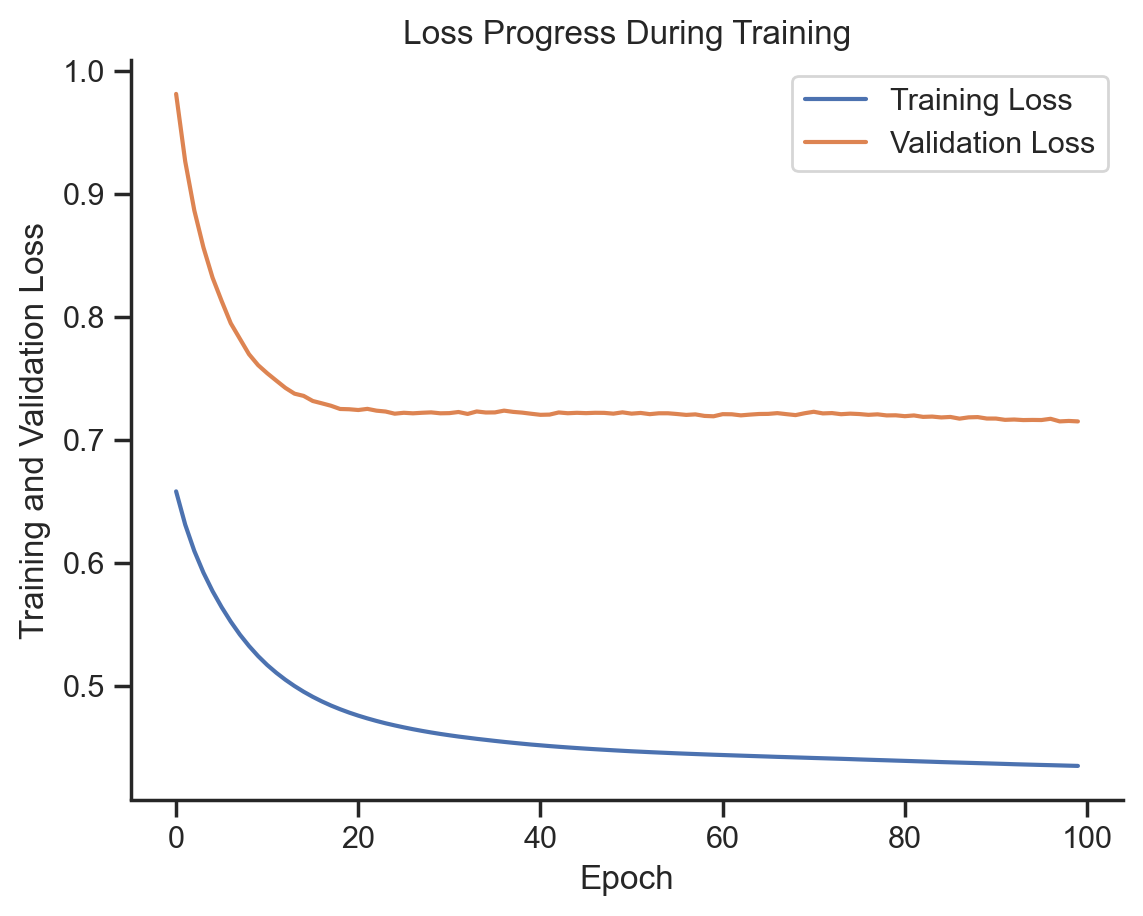

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

The neural networks is valid because the two loss curves are relatively stable in the end.

### 12.3 Model Evaluation
**Confusion Matrix**

39/39 [==============================] - 0s 1ms/step


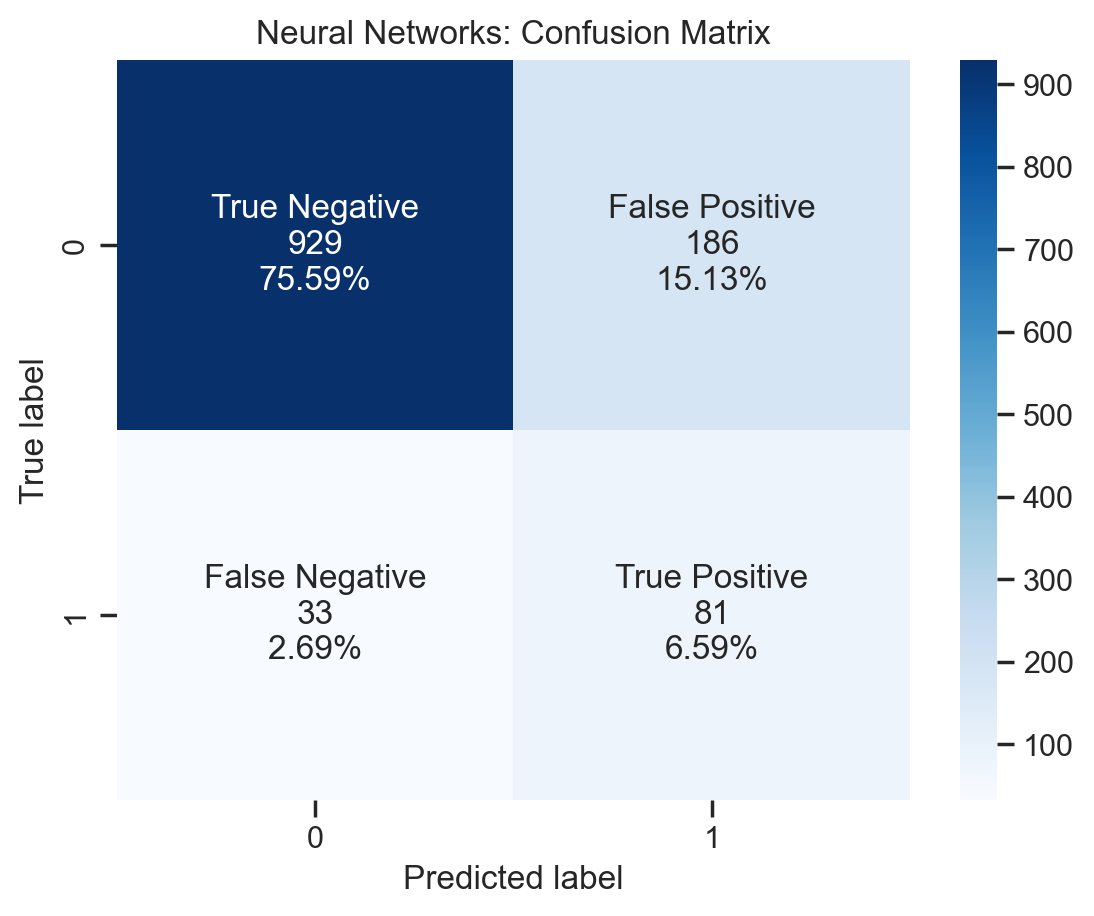

In [74]:
# prediction
y_predict_nn_logit = nn_model.predict(X_test_ss)
# after sigmoid we get the probabilies to be 1
y_predict_nn_prod = tf.nn.sigmoid(y_predict_nn_logit)
# the predicted label will be 1 only when the probability >= 0.5
y_predict_nn = tf.round(y_predict_nn_prod)

# confusion matrix
nn_cf_matrix = confusion_matrix(y_test, y_predict_nn)
plot_cf_matrix(nn_cf_matrix, 'Neural Networks')
plt.show()

**AUC**

No Skill: ROC AUC=0.5
Neural Networks: ROC AUC=0.862


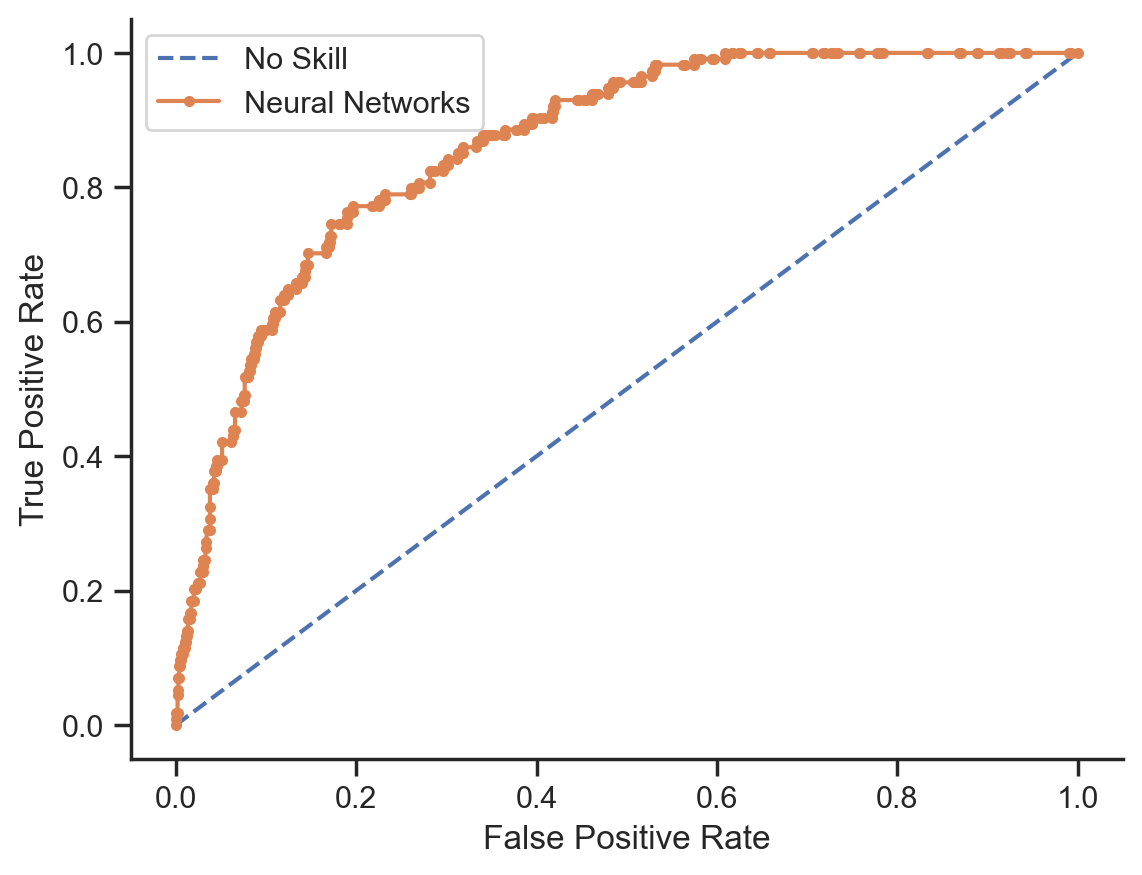

In [75]:
nn_auc, nn_roc_plot = plot_auc(y_test, y_predict_nn_prod, model_name="Neural Networks")

**Performance Metrics**

In [76]:
# precision, accuracy, f1-score, and AUC
nn_model_scores = binary_classification_scores(nn_cf_matrix, auc=nn_auc, 
                                               model_name='Neural Networks')
nn_model_scores

,Accuracy,Precision,Recall,F1 Score,AUC
Model_Name,,,,,
Neural Networks,0.822,0.303,0.711,0.425,0.862


## 13. Model Comparison

Now we have performance metrics of 4 models, which one is the best?

**ROC Curve**

No Skill: ROC AUC=0.5
Logistic Regression: ROC AUC=0.864
SVM: ROC AUC=0.821
Random Forest: ROC AUC=0.807
Neural Networks: ROC AUC=0.862


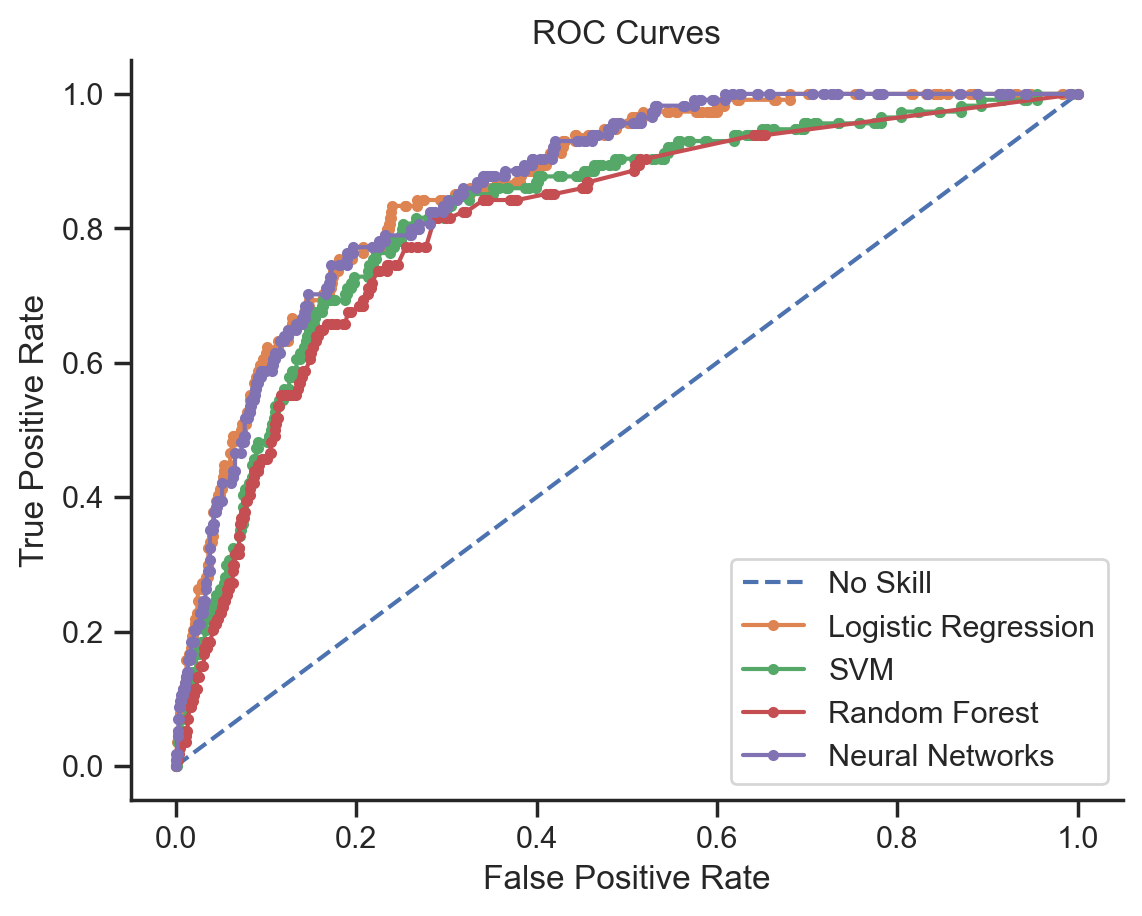

In [77]:
plot_auc(y_test, 
    y_test_predict_probs_lr, 
    model_name="Logistic Regression")
plot_auc(y_test, 
    y_test_predict_probs_svm, 
    display_no_skill=False,
    model_name="SVM")
plot_auc(y_test, 
    y_test_predict_probs_rf, 
    display_no_skill=False,
    model_name="Random Forest")
plot_auc(y_test, 
    y_predict_nn_prod, 
    display_no_skill=False,
    model_name="Neural Networks",
    title="ROC Curves")
plt.show()

**Performance Metrics**

In [78]:
# show performance metrics of all models
combined = pd.concat([lr_scores, svm_model_scores, nn_model_scores, rf_model_scores])
combined.sort_values(by=['F1 Score'], ascending=False)

,Accuracy,Precision,Recall,F1 Score,AUC
Model_Name,,,,,
Neural Networks,0.822,0.303,0.711,0.425,0.862
LogisticRegression (ADASYN),0.765,0.260,0.833,0.397,0.864
SVM,0.782,0.262,0.746,0.388,0.821
Random Forest,0.876,0.339,0.360,0.349,0.807


In this project, let's select **Neural Networks** as the final model because it performed best with a sensitivity (recall) 71%, a precision of 30%, f1 score 0.425 and a measured AUC of 0.862.

Next, let's optimize the neural networks model.

## 14. Neural Networks Optimization

We already know that the neural network model has the highest F1 score, how can we further optimize the model?

There are 2 directions to modify its architecture: width and depth. Let's try both directions.

**Width**

More specially, we can keep the number of hidden layers to 1, make sure the # of nodes is between [2, 28] based on the rule we've mentioned earlier (the number of hidden neurons should be less than twice the size of the input layer). 

In [84]:
# set seed
np.random.seed(42)
tf.random.set_seed(42)

# get the list of models
one_layer_models = get_nn_models(
    num_layers=1, 
    min_nodes_per_layer=2, 
    max_nodes_per_layer=28, 
    node_step_size=4, 
    input_shape=(14,)
)

print(f'# of models = {len(one_layer_models)}')
for model in one_layer_models:
    print(model.name)

# of models = 7
dense2
dense6
dense10
dense14
dense18
dense22
dense26


In [85]:
# train and evaluate models
preds, optimization_results = evaludate_nn_models(
    models=one_layer_models,
    X_train=X_train_oversample,
    y_train=y_train_oversample,
    X_test=X_test_ss,
    y_test=y_test
)

39/39 [==============================] - 0s 960us/step


The final performance metrics:

In [86]:
optimization_results.sort_values(by=['f1', 'recall'], ascending=False)

,model_name,accuracy,precision,recall,f1,auc
6,dense26,0.836,0.324,0.711,0.445,0.861
1,dense6,0.820,0.308,0.754,0.438,0.863
4,dense18,0.829,0.311,0.693,0.429,0.863
5,dense22,0.831,0.312,0.684,0.429,0.865
2,dense10,0.822,0.303,0.711,0.425,0.861
3,dense14,0.827,0.304,0.675,0.420,0.863
0,dense2,0.783,0.270,0.789,0.403,0.845


The best performance metrics are from 1 hidden layer with 26 nodes, which means better results may from more complex structures. 

**Depth**

Now let's increase the number of hidden layers to 2, and make sure the min # of nodes is more than the initial size 6 to increase its complexity.

In [88]:
two_layer_models = get_nn_models(
    num_layers=2, 
    min_nodes_per_layer=6, 
    max_nodes_per_layer=28,
    node_step_size=6,
    input_shape=(14,)
)

print(f'# of models = {len(two_layer_models)}')
for model in two_layer_models:
    print(model.name)

# of models = 16
dense6_dense6
dense6_dense12
dense6_dense18
dense6_dense24
dense12_dense6
dense12_dense12
dense12_dense18
dense12_dense24
dense18_dense6
dense18_dense12
dense18_dense18
dense18_dense24
dense24_dense6
dense24_dense12
dense24_dense18
dense24_dense24


In [89]:
# train and evaluate models
deep_preds, deep_optimization_results = evaludate_nn_models(
    models=two_layer_models,
    X_train=X_train_oversample,
    y_train=y_train_oversample,
    X_test=X_test_ss,
    y_test=y_test
)

39/39 [==============================] - 0s 1ms/step


In [90]:
deep_optimization_results.sort_values(by=['f1', 'recall'], ascending=False)

,model_name,accuracy,precision,recall,f1,auc
4,dense12_dense6,0.836,0.325,0.711,0.446,0.852
15,dense24_dense24,0.832,0.317,0.702,0.437,0.856
5,dense12_dense12,0.827,0.312,0.719,0.435,0.846
7,dense12_dense24,0.833,0.317,0.693,0.435,0.852
1,dense6_dense12,0.819,0.305,0.746,0.433,0.863
13,dense24_dense12,0.832,0.315,0.693,0.433,0.852
9,dense18_dense12,0.836,0.318,0.667,0.431,0.855
8,dense18_dense6,0.836,0.316,0.658,0.427,0.855
2,dense6_dense18,0.816,0.300,0.737,0.426,0.863
12,dense24_dense6,0.832,0.311,0.667,0.425,0.850


Combing the 1 layer and 2 layers metrics:

In [91]:
pd.concat([optimization_results, deep_optimization_results]).sort_values(by=['f1', 'recall'], ascending=False)

,model_name,accuracy,precision,recall,f1,auc
4,dense12_dense6,0.836,0.325,0.711,0.446,0.852
6,dense26,0.836,0.324,0.711,0.445,0.861
1,dense6,0.820,0.308,0.754,0.438,0.863
15,dense24_dense24,0.832,0.317,0.702,0.437,0.856
5,dense12_dense12,0.827,0.312,0.719,0.435,0.846
7,dense12_dense24,0.833,0.317,0.693,0.435,0.852
1,dense6_dense12,0.819,0.305,0.746,0.433,0.863
13,dense24_dense12,0.832,0.315,0.693,0.433,0.852
9,dense18_dense12,0.836,0.318,0.667,0.431,0.855
4,dense18,0.829,0.311,0.693,0.429,0.863


The top 3 performance are from the dense12_dense6 (1st hidden layer of 12 nodes, 2nd hidden layer of 6 nodes), dense26 (1 hidden layer with 26 nodes), and dense6 (1 hidden layer with 6 nodes), they are all relatively simple architecture, which means the dataset is relatively small and linear, that explains why Logistic Regression works better than SVM and Random Forest. A simple neural network model is equivalent to logistic regression with a small amount of non-linearity added to better explain the data.

Overall, the precision on the osteoprosis label is relatively low, that's because it's a small and imbalanced dataset. We will likely get better performance as more data is collected. Overall, given the high recall value, the predictive model with Neural Networks algorithm can still be used as an inference agent to assist professionals in osteoporosis diagnosis.